In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import drive
# import os

# # Mount Google Drive
# drive.mount('/content/drive')

# # Define the dataset storage path in Google Drive
# dataset_path = "/content/drive/MyDrive/UCSD_Anomaly_Dataset.tar.gz"
# extract_path = "/content/drive/MyDrive/UCSD_Anomaly_Dataset/"

# # Download the dataset (only if it does not already exist)
# if not os.path.exists(dataset_path):
#     !wget -c "http://www.svcl.ucsd.edu/projects/anomaly/UCSD_Anomaly_Dataset.tar.gz" -O "{dataset_path}"

# # Extract the dataset directly in Google Drive
# !mkdir -p "{extract_path}"
# !tar -xzf "{dataset_path}" -C "{extract_path}"

# # Remove the compressed file to save space
# !rm "{dataset_path}"

# print("✅ Dataset downloaded and saved to Google Drive!")

In [ ]:
# import os

# folder_path = '/content/drive/MyDrive/UCSD_Anomaly_Dataset'

# # استفاده از دستور سیستم برای حذف سریع‌تر
# os.system(f'rm -rf "{folder_path}"')

# print("✅ Folder and its contents have been deleted.")

In [ ]:
# !wget -c "http://www.svcl.ucsd.edu/projects/anomaly/UCSD_Anomaly_Dataset.tar.gz" -O "/content/drive/MyDrive/UCSD_Anomaly_Dataset.tar.gz"


In [5]:
import os
import cv2
from google.colab import drive

# ✅ Mount Google Drive
drive.mount('/content/drive')

# ✅ Dataset path
DATASET_PATH = "/content/drive/MyDrive/UCSD_Anomaly_Dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1"

# ✅ Anomalous frame ranges for each test video
TestVideoFile = {
    "Test001": range(59,152), "Test002": range(49,175), "Test003": range(90,200), "Test004": range(30,168),
    "Test005": list(range(4,90)) + list(range(139,200)), "Test006": list(range(0,100)) + list(range(109,200)),
    "Test007": range(0,175), "Test008": range(0,94), "Test009": range(0,48), "Test010": range(0,140),
    "Test011": range(69,165), "Test012": range(130,200), "Test013": range(0,156), "Test014": range(0,200),
    "Test015": range(137,200), "Test016": range(122,200), "Test017": range(0,47), "Test018": range(53,120),
    "Test019": range(63,138), "Test020": range(44,175), "Test021": range(30,200), "Test022": range(16,107),
    "Test023": range(8,165), "Test024": range(49,171), "Test025": range(39,135), "Test026": range(77,144),
    "Test027": range(9,122), "Test028": range(104,200), "Test029": list(range(0,15)) + list(range(44,113)),
    "Test030": range(174,200), "Test031": range(0,180), "Test032": list(range(0,52)) + list(range(64,115)),
    "Test033": range(4,165), "Test034": range(0,121), "Test035": range(85,200), "Test036": range(14,108)
}

def count_frames(dataset_type):
    path = os.path.join(DATASET_PATH, dataset_type)
    normal_count = 0
    anomaly_count = 0

    for folder in sorted(os.listdir(path)):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path) and not folder.endswith("_gt"):
            for filename in sorted(os.listdir(folder_path)):
                if filename.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp','tif')):
                    try:
                        frame_idx = int(os.path.splitext(filename)[0])
                        if dataset_type == "Test":
                            anomaly_range = TestVideoFile.get(folder, [])
                            if frame_idx in anomaly_range:
                                anomaly_count += 1
                            else:
                                normal_count += 1
                        else:
                            normal_count += 1
                    except ValueError:
                        continue
    return normal_count, anomaly_count

# ✅ Count for both Train and Test
train_normal, train_abnormal = count_frames("Train")
test_normal, test_abnormal = count_frames("Test")

# ✅ Display results
print(f"Train Set → Normal: {train_normal}, Anomalous: {train_abnormal} (should be 0)")
print(f"Test Set  → Normal: {test_normal}, Anomalous: {test_abnormal}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Set → Normal: 6800, Anomalous: 0 (should be 0)
Test Set  → Normal: 3171, Anomalous: 4029


In [6]:
import os
import cv2
import shutil

# ✅ Paths for Train and Test directories
TRAIN_PATH = os.path.join(DATASET_PATH, "Train")
TEST_PATH = os.path.join(DATASET_PATH, "Test")

# ✅ Output directories for extracted frames
NORMAL_DIR = "/content/All_Normal_Frames"
ANOMALY_DIR = "/content/All_Anomaly_Frames"

# ✅ Create output directories if they don't exist
os.makedirs(NORMAL_DIR, exist_ok=True)
os.makedirs(ANOMALY_DIR, exist_ok=True)

# ✅ Frame counters
normal_count = 0
anomaly_count = 0

# ✅ Function to process folders and extract frames
def process_directory(directory_path, is_test=False):
    global normal_count, anomaly_count

    for folder in sorted(os.listdir(directory_path)):
        folder_path = os.path.join(directory_path, folder)

        if os.path.isdir(folder_path) and not folder.endswith("_gt"):
            anomaly_range = TestVideoFile.get(folder, []) if is_test else []

            for filename in sorted(os.listdir(folder_path)):
                if filename.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp', 'tif', 'tiff')):
                    try:
                        frame_idx = int(os.path.splitext(filename)[0])
                        src_path = os.path.join(folder_path, filename)

                        if is_test and frame_idx in anomaly_range:
                            dst_path = os.path.join(ANOMALY_DIR, f"{folder}_{filename}")
                            shutil.copyfile(src_path, dst_path)
                            anomaly_count += 1
                        else:
                            dst_path = os.path.join(NORMAL_DIR, f"{folder}_{filename}")
                            shutil.copyfile(src_path, dst_path)
                            normal_count += 1
                    except ValueError:
                        continue

# ✅ Run processing for both Train and Test sets
print("🔍 Processing Train set...")
process_directory(TRAIN_PATH, is_test=False)

print("🔍 Processing Test set...")
process_directory(TEST_PATH, is_test=True)

# ✅ Print summary
print("\n📊 Frame Summary:")
print(f"✅ Total Normal Frames   : {normal_count}")
print(f"✅ Total Anomalous Frames: {anomaly_count}")
print(f"\n📁 Saved in:\n  - Normal : {NORMAL_DIR}\n  - Anomaly: {ANOMALY_DIR}")


🔍 Processing Train set...
🔍 Processing Test set...

📊 Frame Summary:
✅ Total Normal Frames   : 9971
✅ Total Anomalous Frames: 4029

📁 Saved in:
  - Normal : /content/All_Normal_Frames
  - Anomaly: /content/All_Anomaly_Frames


In [7]:
import cv2
import os
import shutil

# Paths
NORMAL_DIR = "/content/All_Normal_Frames"
ANOMALY_DIR_ORIGINAL = "/content/All_Anomaly_Frames"
ANOMALY_DIR_BALANCED = "/content/All_Anomaly_Frames_Balanced"

# Delete the previously balanced anomaly directory if it exists
if os.path.exists(ANOMALY_DIR_BALANCED):
    shutil.rmtree(ANOMALY_DIR_BALANCED)
    print(f"🗑️ Directory {ANOMALY_DIR_BALANCED} removed.")

# Create a new balanced anomaly directory
os.makedirs(ANOMALY_DIR_BALANCED, exist_ok=True)
print(f"📁 New directory {ANOMALY_DIR_BALANCED} created.")

# Only consider .tif files
original_files = sorted([f for f in os.listdir(ANOMALY_DIR_ORIGINAL) if f.lower().endswith('.tif')])

# Copy original anomaly files
for fname in original_files:
    src = os.path.join(ANOMALY_DIR_ORIGINAL, fname)
    dst = os.path.join(ANOMALY_DIR_BALANCED, fname)
    shutil.copyfile(src, dst)

# Target anomaly frame count equal to number of normal frames
TARGET_ANOMALY_COUNT = len([f for f in os.listdir(NORMAL_DIR) if f.lower().endswith('.tif')])

print(f"🎯 Target: {TARGET_ANOMALY_COUNT} anomaly frames")

augmented_count = len(original_files)
idx = 0

while augmented_count < TARGET_ANOMALY_COUNT and idx < len(original_files):
    img_path = os.path.join(ANOMALY_DIR_ORIGINAL, original_files[idx])
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

    if img is None:
        print(f"⚠️ Corrupted file skipped: {img_path}")
        idx += 1
        continue

    flipped = cv2.flip(img, 1)
    rotated90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    rotated180 = cv2.rotate(img, cv2.ROTATE_180)

    base_name = os.path.splitext(original_files[idx])[0]

    for aug_img, suffix in zip([flipped, rotated90, rotated180], ['_flip', '_r90', '_r180']):
        if augmented_count >= TARGET_ANOMALY_COUNT:
            break
        new_name = f"{base_name}{suffix}.tif"
        save_path = os.path.join(ANOMALY_DIR_BALANCED, new_name)
        cv2.imwrite(save_path, aug_img)
        augmented_count += 1

    idx += 1

# Final counts of .tif files in each directory
final_normal = len([f for f in os.listdir(NORMAL_DIR) if f.lower().endswith('.tif')])
final_anomaly = len([f for f in os.listdir(ANOMALY_DIR_BALANCED) if f.lower().endswith('.tif')])

print("\n📊 Final Frame Count Summary:")
print(f"✅ Normal frames: {final_normal}")
print(f"✅ Anomaly frames (balanced): {final_anomaly}")
print(f"📁 Normal frames path: {NORMAL_DIR}")
print(f"📁 Anomaly frames path: {ANOMALY_DIR_BALANCED}")


🗑️ Directory /content/All_Anomaly_Frames_Balanced removed.
📁 New directory /content/All_Anomaly_Frames_Balanced created.
🎯 Target: 9971 anomaly frames

📊 Final Frame Count Summary:
✅ Normal frames: 9971
✅ Anomaly frames (balanced): 9971
📁 Normal frames path: /content/All_Normal_Frames
📁 Anomaly frames path: /content/All_Anomaly_Frames_Balanced


In [8]:
import os
import shutil

# Main data directories
NORMAL_DIR = "/content/All_Normal_Frames"
ANOMALY_DIR = "/content/All_Anomaly_Frames_Balanced"  # or any path where anomaly frames are balanced

# Destination directory for Keras-compatible structure
BALANCED_DIR = "/content/frames_balanced"
BALANCED_NORMAL = os.path.join(BALANCED_DIR, "normal")
BALANCED_ANOMALY = os.path.join(BALANCED_DIR, "abnormal")

# Create necessary directories
os.makedirs(BALANCED_NORMAL, exist_ok=True)
os.makedirs(BALANCED_ANOMALY, exist_ok=True)

# Copy normal frames
for fname in os.listdir(NORMAL_DIR):
    src = os.path.join(NORMAL_DIR, fname)
    dst = os.path.join(BALANCED_NORMAL, fname)
    shutil.copyfile(src, dst)

# Copy anomaly frames
for fname in os.listdir(ANOMALY_DIR):
    src = os.path.join(ANOMALY_DIR, fname)
    dst = os.path.join(BALANCED_ANOMALY, fname)
    shutil.copyfile(src, dst)

print(f"✅ Folders created and files copied to:\n{BALANCED_NORMAL}\n{BALANCED_ANOMALY}")


✅ Folders created and files copied to:
/content/frames_balanced/normal
/content/frames_balanced/abnormal


In [ ]:
import os
import numpy as np
import cv2
import torch
import timm
from tqdm import tqdm
from torchvision import transforms

# ⚙️ Settings
IMG_SIZE = 224
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 📁 Data paths
normal_dir = "/content/frames_balanced/normal"
anomaly_dir = "/content/frames_balanced/abnormal"
save_dir = "/content"

# ✅ List of models
model_names = [
    'convnext_tiny',
    'repvgg_a0',
    'mobileone_s0',
    'poolformer_s12',
    'maxvit_tiny_tf_224',
    'coatnet_0_rw_224'
]

# ✅ Image preprocessing
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 📥 Get list of image paths
def get_image_paths(directory):
    return [os.path.join(directory, f)
            for f in os.listdir(directory)
            if f.lower().endswith(('.jpg', '.jpeg', '.png','tif','tiff'))]

# 🔍 Feature extraction
def extract_features(model, image_paths):
    features = []
    for path in tqdm(image_paths, desc="Extracting features"):
        img = cv2.imread(path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_tensor = preprocess(img).unsqueeze(0).to(device)

        with torch.no_grad():
            feat = model(img_tensor)
        features.append(feat.cpu().numpy().squeeze())
    return np.array(features)

# 🔁 Run processing for each model
for model_name in model_names:
    print(f"\n🔧 Processing model: {model_name}")
    model = timm.create_model(model_name, pretrained=True, num_classes=0)
    model.eval()

    # ⛔ Freeze 85% of layers
    total_layers = sum(1 for _ in model.parameters())
    trainable_start = int(total_layers * 0.85)
    for i, param in enumerate(model.parameters()):
        param.requires_grad = i >= trainable_start
    model.to(device)

    # 🔹 Normal and anomaly frames
    normal_paths = get_image_paths(normal_dir)
    anomaly_paths = get_image_paths(anomaly_dir)

    print("🔹 Extracting NORMAL features...")
    normal_features = extract_features(model, normal_paths)

    print("🔸 Extracting ANOMALY features...")
    anomaly_features = extract_features(model, anomaly_paths)

    # 💾 Save features
    model_id = model_name.replace('/', '_')
    np.save(os.path.join(save_dir, f'normal_features_{model_id}.npy'), normal_features)
    np.save(os.path.join(save_dir, f'anomaly_features_{model_id}.npy'), anomaly_features)

    print(f"✅ Saved features for model: {model_id}")



🔧 Processing model: convnext_tiny
🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 9971/9971 [01:42<00:00, 97.54it/s] 


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 9971/9971 [01:37<00:00, 101.89it/s]


✅ Saved features for model: convnext_tiny

🔧 Processing model: repvgg_a0


model.safetensors:   0%|          | 0.00/36.6M [00:00<?, ?B/s]

🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 9971/9971 [01:38<00:00, 100.97it/s]


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 9971/9971 [01:40<00:00, 98.77it/s] 


✅ Saved features for model: repvgg_a0

🔧 Processing model: mobileone_s0


model.safetensors:   0%|          | 0.00/21.7M [00:00<?, ?B/s]

🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 9971/9971 [04:58<00:00, 33.43it/s]


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 9971/9971 [04:59<00:00, 33.25it/s]


✅ Saved features for model: mobileone_s0

🔧 Processing model: poolformer_s12


model.safetensors:   0%|          | 0.00/47.7M [00:00<?, ?B/s]

🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 9971/9971 [01:25<00:00, 117.07it/s]


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 9971/9971 [01:28<00:00, 113.12it/s]


✅ Saved features for model: poolformer_s12

🔧 Processing model: maxvit_tiny_tf_224


model.safetensors:   0%|          | 0.00/124M [00:00<?, ?B/s]

🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 9971/9971 [05:25<00:00, 30.63it/s]


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 9971/9971 [05:30<00:00, 30.19it/s]


✅ Saved features for model: maxvit_tiny_tf_224

🔧 Processing model: coatnet_0_rw_224


model.safetensors:   0%|          | 0.00/110M [00:00<?, ?B/s]

🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 9971/9971 [02:22<00:00, 70.19it/s]


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 9971/9971 [02:20<00:00, 70.76it/s]


✅ Saved features for model: coatnet_0_rw_224


In [ ]:
for model_name in model_names:
    model_id = model_name.replace('/', '_')
    normal_path = os.path.join(save_dir, f'normal_features_{model_id}.npy')
    anomaly_path = os.path.join(save_dir, f'anomaly_features_{model_id}.npy')

    if not os.path.exists(normal_path) or not os.path.exists(anomaly_path):
        print(f"❌ Missing: {model_id}")
        continue

    normal_features = np.load(normal_path)
    anomaly_features = np.load(anomaly_path)

    print(f"✅ {model_id} - Normal: {normal_features.shape}, Anomaly: {anomaly_features.shape}")


✅ convnext_tiny - Normal: (9971, 768), Anomaly: (9970, 768)
✅ repvgg_a0 - Normal: (9971, 1280), Anomaly: (9970, 1280)
✅ mobileone_s0 - Normal: (9971, 1024), Anomaly: (9970, 1024)
✅ poolformer_s12 - Normal: (9971, 512), Anomaly: (9970, 512)
✅ maxvit_tiny_tf_224 - Normal: (9971, 512), Anomaly: (9970, 512)
✅ coatnet_0_rw_224 - Normal: (9971, 768), Anomaly: (9970, 768)


In [2]:
!pip install grad-cam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.7 M

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


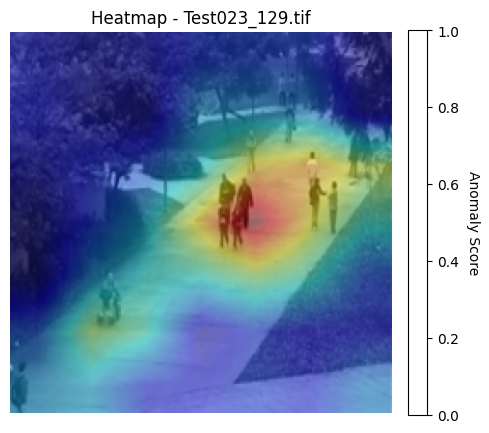

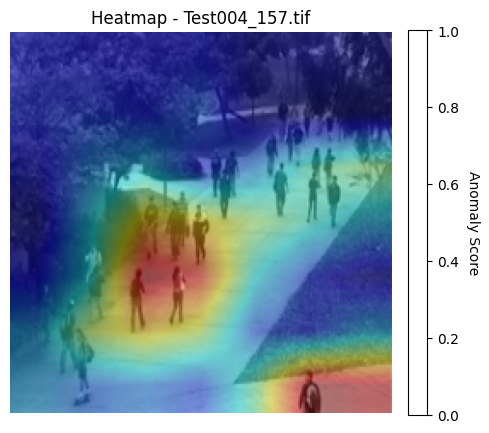

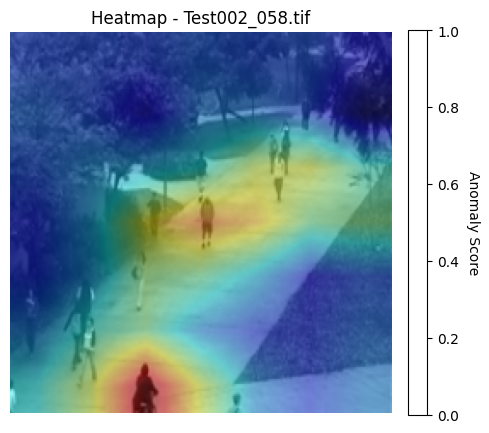

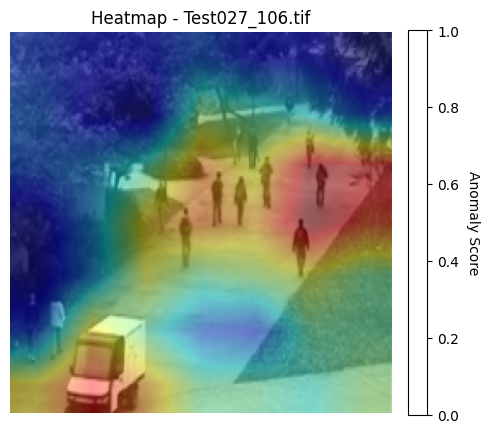

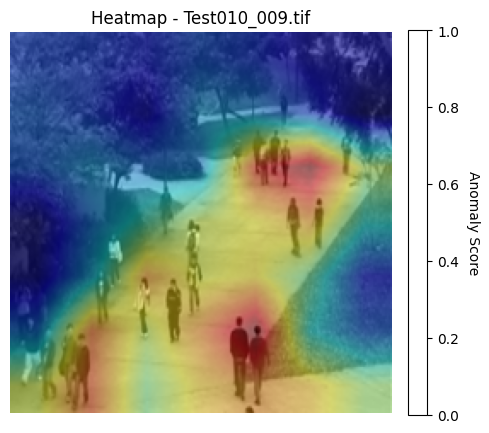

In [9]:
import os
import numpy as np
import cv2
import torch
import timm
import torch.nn.functional as F
from torchvision import transforms
import matplotlib.pyplot as plt
import random

# ⚙️ Path to abnormal images
anomaly_dir = "/content/All_Anomaly_Frames"
IMG_SIZE = 224

# 🌀 Preprocessing
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 🧠 Load model
model = timm.create_model('repvgg_a0', pretrained=True, num_classes=2)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 🔍 Grad-CAM++
class GradCAMPlusPlus:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output
        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0]
        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def generate(self, input_tensor):
        self.model.zero_grad()
        output = self.model(input_tensor)
        class_idx = torch.argmax(output, dim=1).item()
        score = output[0, class_idx]
        score.backward()

        gradients = self.gradients
        activations = self.activations

        b, k, h, w = gradients.size()
        alpha_num = gradients.pow(2)
        alpha_denom = 2 * gradients.pow(2) + activations * gradients.pow(3).sum(-1).sum(-1).view(b, k, 1, 1)
        alpha_denom = torch.where(alpha_denom != 0.0, alpha_denom, torch.ones_like(alpha_denom))
        alpha = alpha_num / alpha_denom

        weights = torch.relu(F.relu(gradients) * alpha).sum(-1).sum(-1).view(b, k, 1, 1)
        cam = (weights * activations).sum(1, keepdim=True)

        cam = F.relu(cam)
        cam = F.interpolate(cam, size=(IMG_SIZE, IMG_SIZE), mode='bilinear', align_corners=False)
        cam = cam - cam.min()
        cam = cam / (cam.max() + 1e-8)

        return cam.cpu().detach().numpy().squeeze()

# 🎯 Identify target convolutional layer
conv_layers = [m for m in model.modules() if isinstance(m, torch.nn.Conv2d)]
target_layer = conv_layers[-1]
gradcam = GradCAMPlusPlus(model, target_layer)

# 📂 Get list of image paths
all_image_paths = sorted([
    os.path.join(anomaly_dir, fname)
    for fname in os.listdir(anomaly_dir)
    if fname.lower().endswith(('.jpg', '.jpeg', '.tif','tiff'))
])

# Randomly select 5 diverse images
random.seed(42)  # for reproducibility
image_paths = random.sample(all_image_paths, min(5, len(all_image_paths)))

# 🔥 Process and display heatmaps
for path in image_paths:
    img = cv2.imread(path)
    if img is None:
        continue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_tensor = preprocess(img_rgb).unsqueeze(0).to(device)

    # Generate heatmap
    heatmap = gradcam.generate(img_tensor)

    # Convert to colored heatmap
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)

    # Resize original image
    img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))

    # Blend heatmap with original image
    alpha = 0.4
    blended = cv2.addWeighted(img_resized, 1 - alpha, heatmap_color, alpha, 0)

    # Display with matplotlib + colorbar
    plt.figure(figsize=(5, 5))
    plt.imshow(blended)
    plt.title(f"Heatmap - {os.path.basename(path)}")
    plt.axis('off')

    # Add colorbar from raw heatmap
    im = plt.imshow(heatmap, cmap='jet', alpha=0)
    cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
    cbar.set_label("Anomaly Score", rotation=270, labelpad=15)

    plt.tight_layout()
    plt.show()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6940 - loss: 0.5555 - val_accuracy: 0.8079 - val_loss: 0.3994
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8036 - loss: 0.4141 - val_accuracy: 0.8347 - val_loss: 0.3557
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8350 - loss: 0.3637 - val_accuracy: 0.8548 - val_loss: 0.3220
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8478 - loss: 0.3394 - val_accuracy: 0.8618 - val_loss: 0.3017
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8604 - loss: 0.3178 - val_accuracy: 0.8801 - val_loss: 0.2804
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8779 - loss: 0.2853 - val_accuracy: 0.8846 - val_loss: 0.2598
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8802 - loss: 0.2785 - val_accuracy: 0.8962 - val_loss: 0.2421
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy:

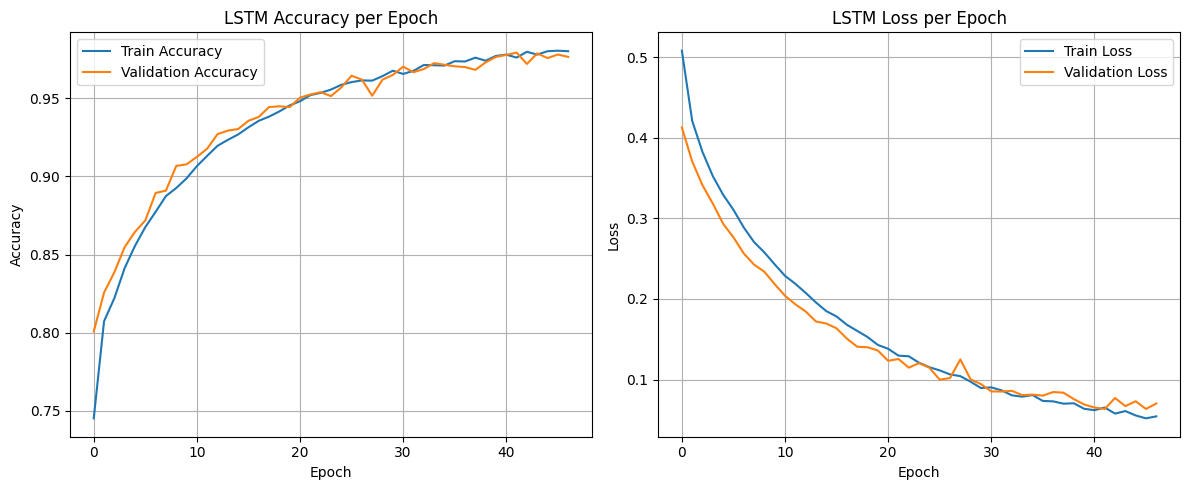


==== Summary for LSTM (over 5 runs) ====
Accuracy: 0.9794 ± 0.0026
Precision: 0.9804 ± 0.0034
Recall: 0.9784 ± 0.0045
F1: 0.9794 ± 0.0026
Auc: 0.9976 ± 0.0004


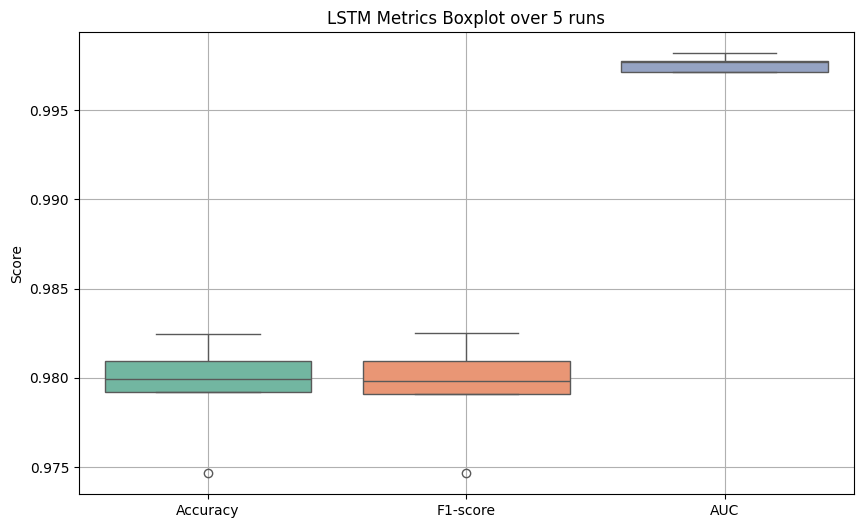


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6803 - loss: 0.5666 - val_accuracy: 0.7946 - val_loss: 0.4122
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7883 - loss: 0.4269 - val_accuracy: 0.8189 - val_loss: 0.3708
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8172 - loss: 0.3904 - val_accuracy: 0.8390 - val_loss: 0.3458
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8245 - loss: 0.3672 - val_accuracy: 0.8530 - val_loss: 0.3242
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8402 - loss: 0.3414 - val_accuracy: 0.8646 - val_loss: 0.2997
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8527 - loss: 0.3251 - val_accuracy: 0.8784 - val_loss: 0.2892
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8607 - loss: 0.3123 - val_accuracy: 0.8809 - val_loss: 0.2711
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 

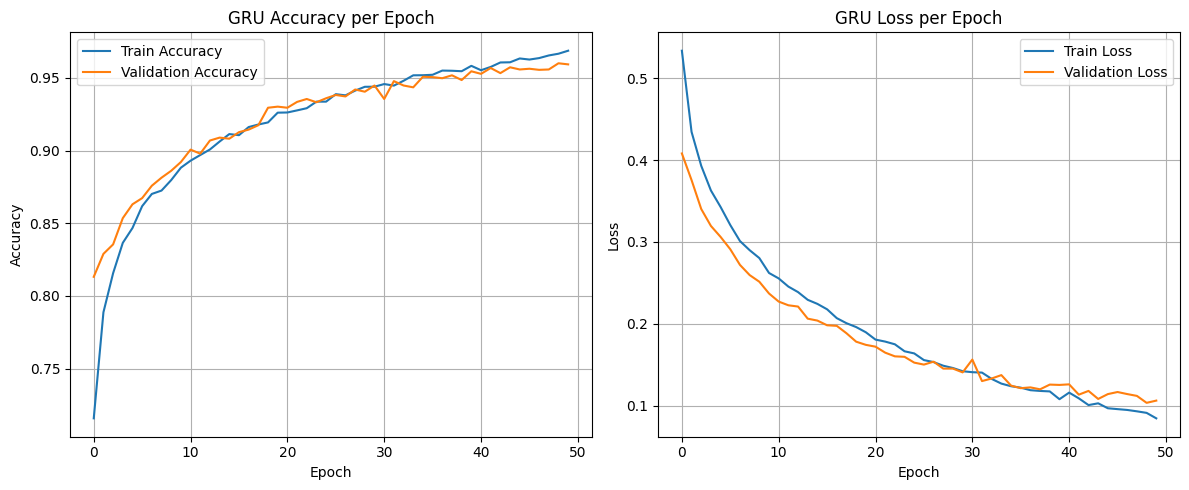


==== Summary for GRU (over 5 runs) ====
Accuracy: 0.9596 ± 0.0016
Precision: 0.9654 ± 0.0099
Recall: 0.9534 ± 0.0075
F1: 0.9593 ± 0.0013
Auc: 0.9932 ± 0.0005


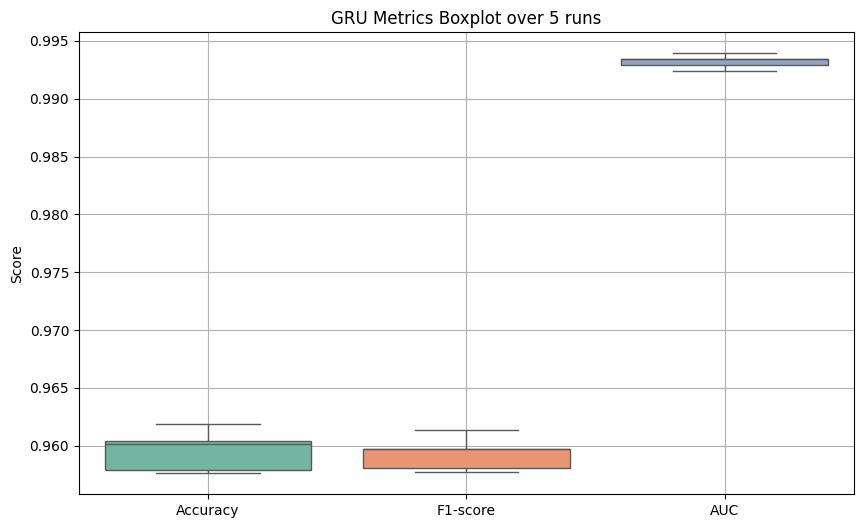


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6175 - loss: 0.6409 - val_accuracy: 0.7876 - val_loss: 0.4512
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7709 - loss: 0.4761 - val_accuracy: 0.8116 - val_loss: 0.3940
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8063 - loss: 0.4131 - val_accuracy: 0.8372 - val_loss: 0.3581
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8262 - loss: 0.3807 - val_accuracy: 0.8590 - val_loss: 0.3183
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8500 - loss: 0.3403 - val_accuracy: 0.8756 - val_loss: 0.2968
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8684 - loss: 0.3136 - val_accuracy: 0.8811 - val_loss: 0.2769
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8733 - loss: 0.2953 - val_accuracy: 0.8806 - val_loss: 0.2787
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accu

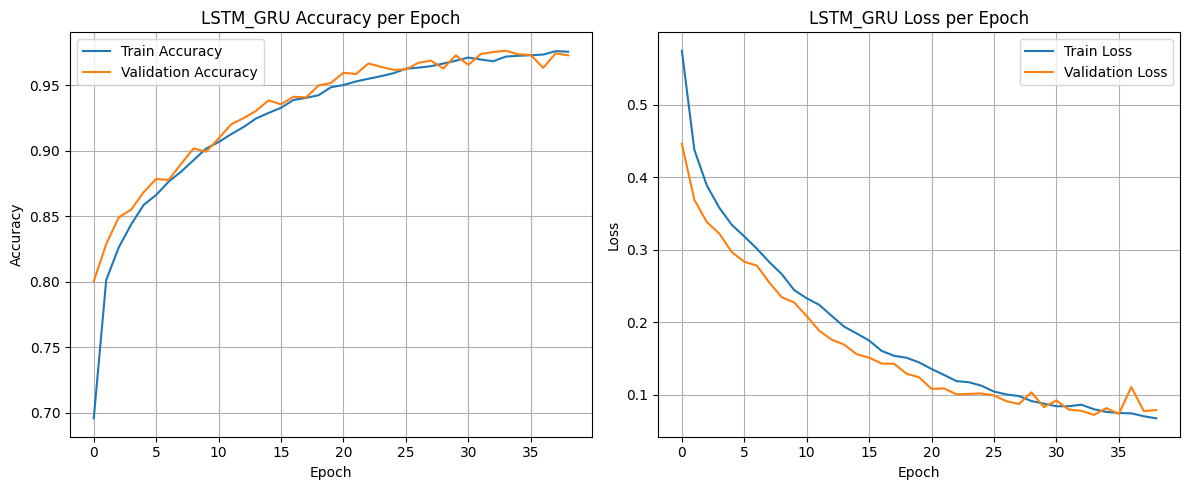


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 0.9794 ± 0.0021
Precision: 0.9827 ± 0.0019
Recall: 0.9759 ± 0.0028
F1: 0.9793 ± 0.0021
Auc: 0.9973 ± 0.0007


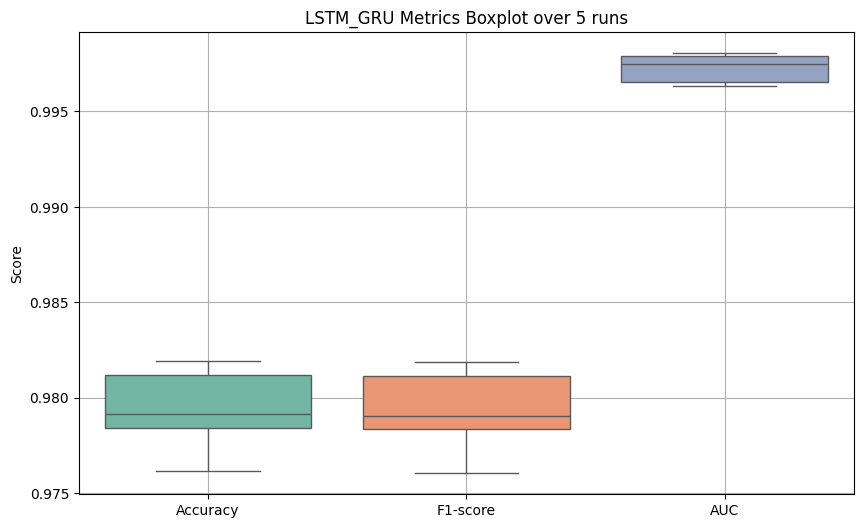


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6466 - loss: 0.6244 - val_accuracy: 0.7956 - val_loss: 0.4326
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7654 - loss: 0.4684 - val_accuracy: 0.8086 - val_loss: 0.3995
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7858 - loss: 0.4354 - val_accuracy: 0.8144 - val_loss: 0.3833
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8010 - loss: 0.4090 - val_accuracy: 0.8302 - val_loss: 0.3614
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8227 - loss: 0.3776 - val_accuracy: 0.8360 - val_loss: 0.3461
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8221 - loss: 0.3743 - val_accuracy: 0.8480 - val_loss: 0.3312
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8417 - loss: 0.3543 - val_accuracy: 0.8600 - val_loss: 0.3201
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accu

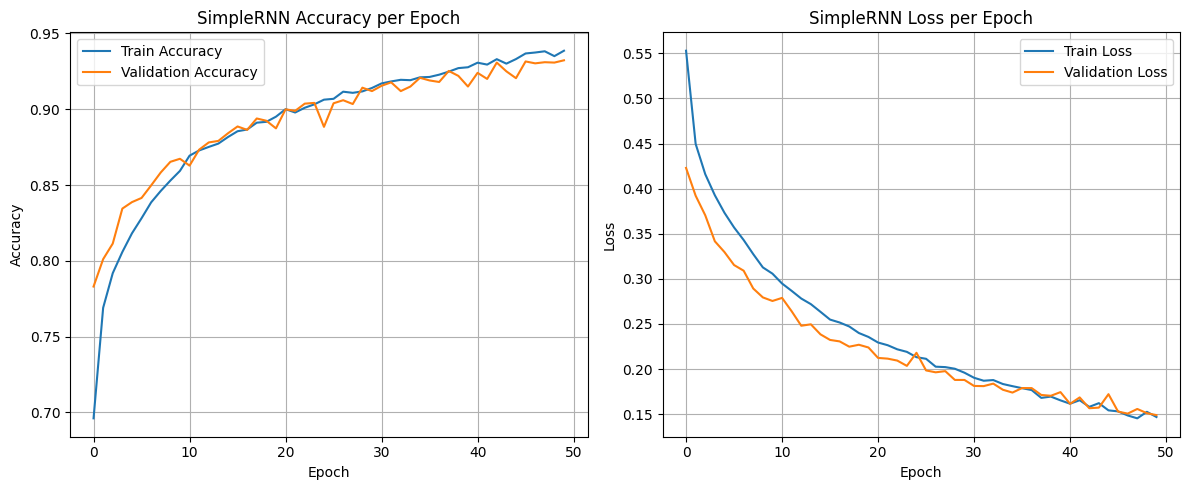


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 0.9388 ± 0.0045
Precision: 0.9571 ± 0.0100
Recall: 0.9190 ± 0.0178
F1: 0.9375 ± 0.0053
Auc: 0.9877 ± 0.0004


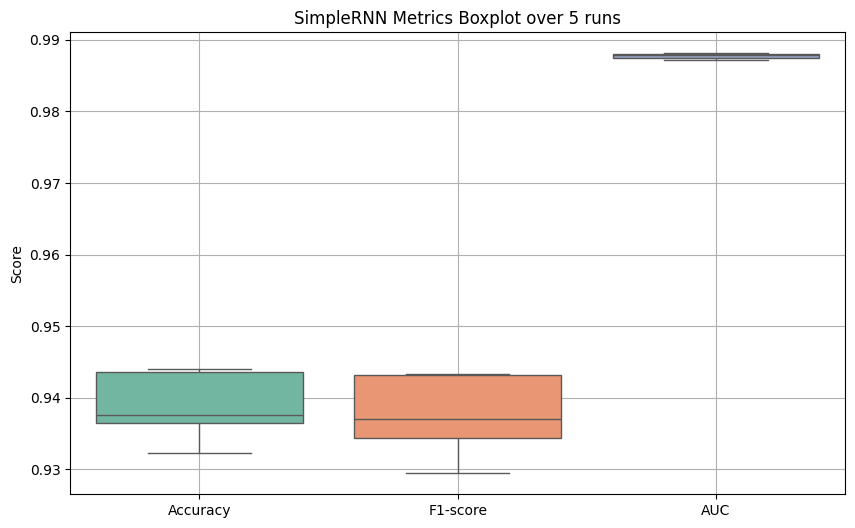


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5933 - loss: 0.6628 - val_accuracy: 0.7675 - val_loss: 0.4783
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7369 - loss: 0.4984 - val_accuracy: 0.7765 - val_loss: 0.4474
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7549 - loss: 0.4714 - val_accuracy: 0.7883 - val_loss: 0.4137
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7778 - loss: 0.4448 - val_accuracy: 0.7986 - val_loss: 0.4042
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7841 - loss: 0.4280 - val_accuracy: 0.8056 - val_loss: 0.3928
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7759 - loss: 0.4276 - val_accuracy: 0.8026 - val_loss: 0.3903
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7932 - loss: 0.4110 - val_accuracy: 0.7991 - val_loss: 0.3837
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy

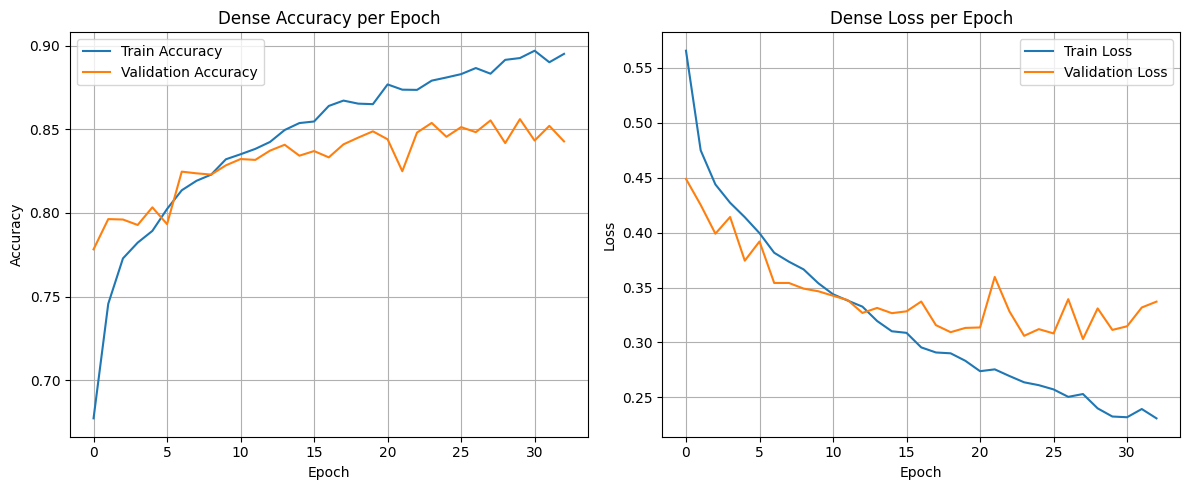


==== Summary for Dense (over 5 runs) ====
Accuracy: 0.8542 ± 0.0038
Precision: 0.8966 ± 0.0133
Recall: 0.8011 ± 0.0129
F1: 0.8460 ± 0.0041
Auc: 0.9350 ± 0.0032


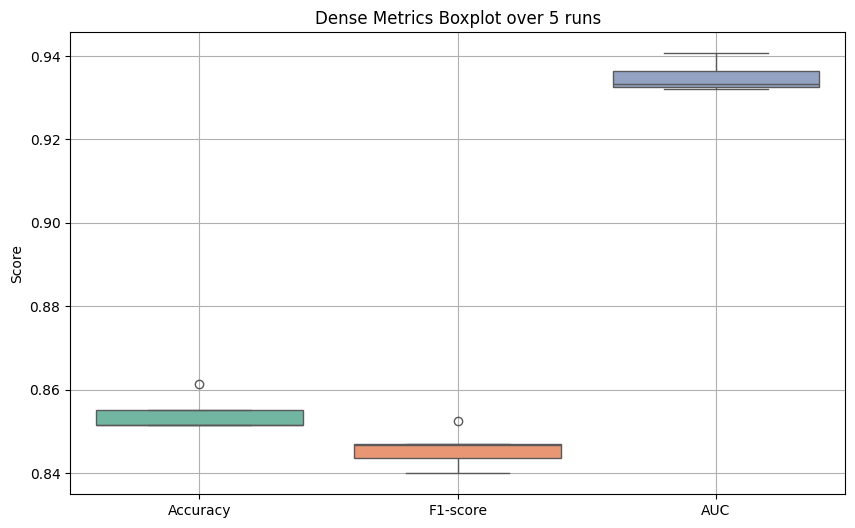


All run results saved to: /content/drive/MyDrive/ped1/results_all_models_convnext_tiny.csv


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'convnext_tiny'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/ped1'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6782 - loss: 0.5673 - val_accuracy: 0.8119 - val_loss: 0.4019
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7999 - loss: 0.4247 - val_accuracy: 0.8470 - val_loss: 0.3565
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8294 - loss: 0.3768 - val_accuracy: 0.8658 - val_loss: 0.3189
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8498 - loss: 0.3416 - val_accuracy: 0.8600 - val_loss: 0.3127
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8639 - loss: 0.3220 - val_accuracy: 0.8949 - val_loss: 0.2669
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8771 - loss: 0.2963 - val_accuracy: 0.8906 - val_loss: 0.2619
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8892 - loss: 0.2782 - val_accuracy: 0.9077 - val_loss: 0.2367
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy:

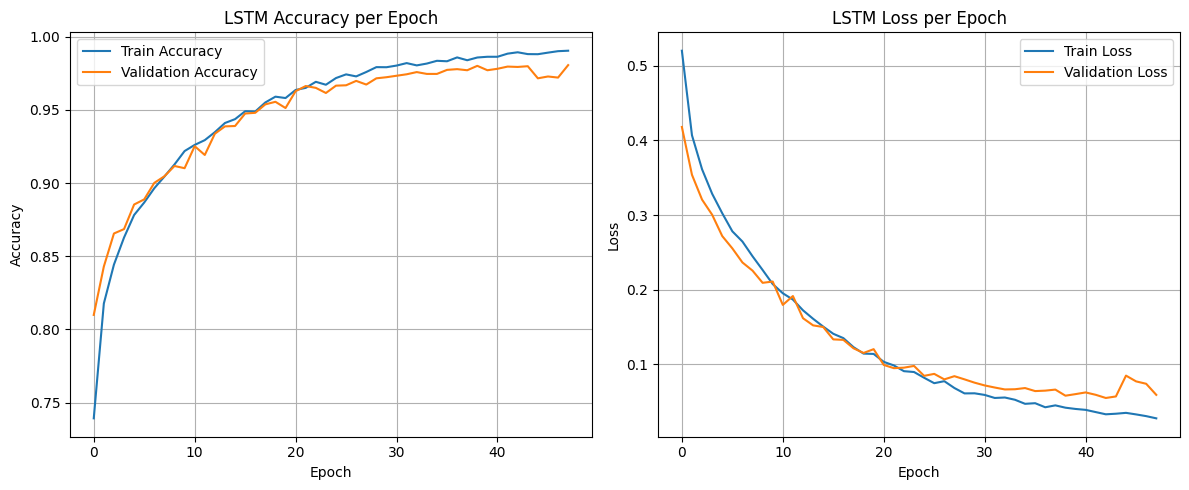


==== Summary for LSTM (over 5 runs) ====
Accuracy: 0.9824 ± 0.0019
Precision: 0.9838 ± 0.0042
Recall: 0.9810 ± 0.0045
F1: 0.9824 ± 0.0019
Auc: 0.9985 ± 0.0004


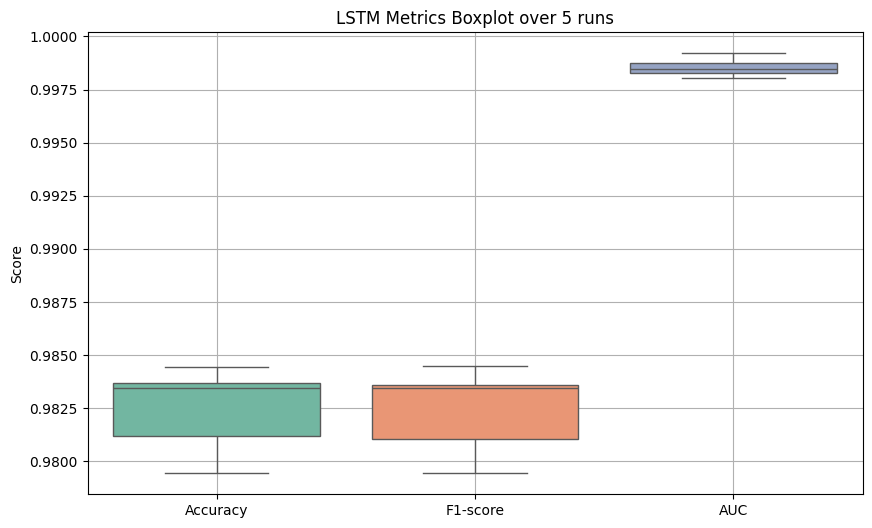


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6774 - loss: 0.5724 - val_accuracy: 0.8039 - val_loss: 0.4151
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7832 - loss: 0.4468 - val_accuracy: 0.8375 - val_loss: 0.3701
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8188 - loss: 0.3972 - val_accuracy: 0.8605 - val_loss: 0.3253
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8485 - loss: 0.3501 - val_accuracy: 0.8701 - val_loss: 0.2959
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8589 - loss: 0.3253 - val_accuracy: 0.8768 - val_loss: 0.2826
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8698 - loss: 0.3011 - val_accuracy: 0.8914 - val_loss: 0.2631
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8802 - loss: 0.2814 - val_accuracy: 0.8949 - val_loss: 0.2502
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 

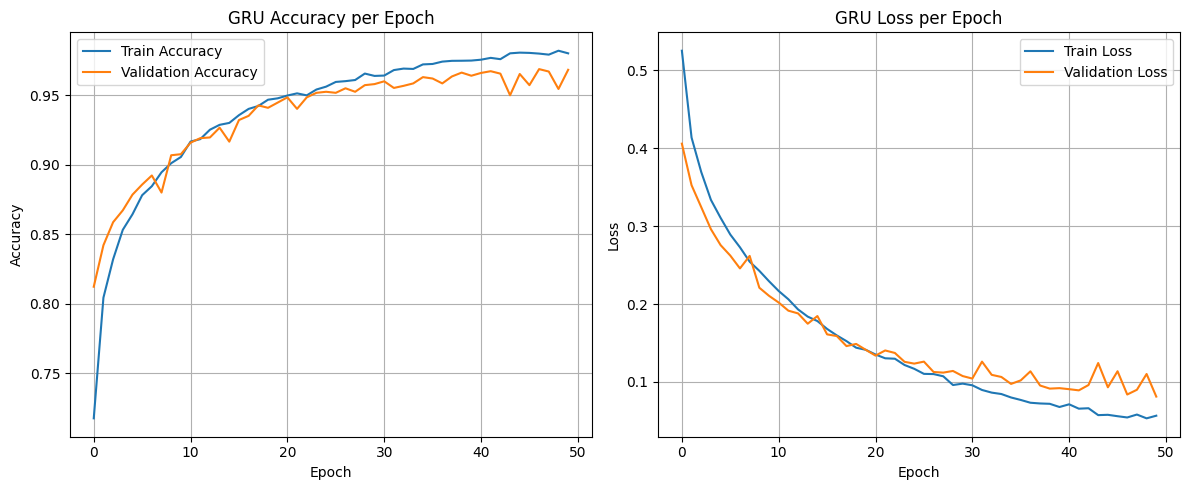


==== Summary for GRU (over 5 runs) ====
Accuracy: 0.9704 ± 0.0017
Precision: 0.9751 ± 0.0024
Recall: 0.9655 ± 0.0043
F1: 0.9702 ± 0.0018
Auc: 0.9963 ± 0.0007


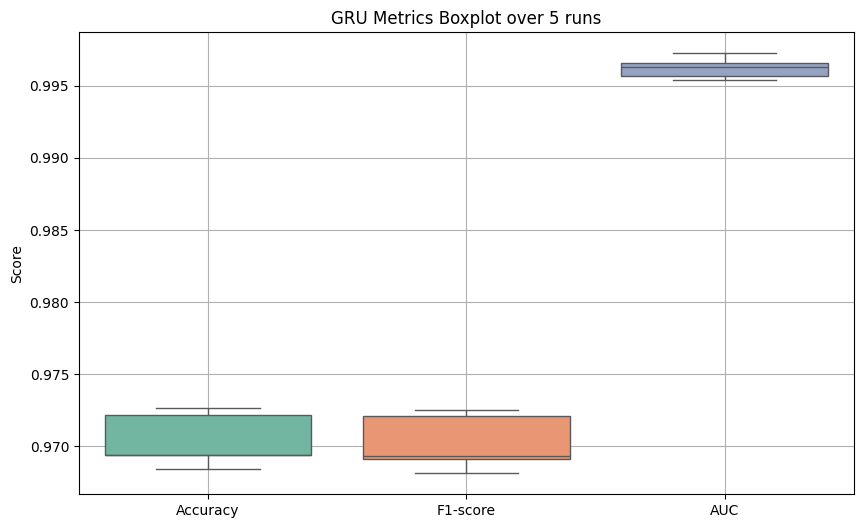


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6028 - loss: 0.6468 - val_accuracy: 0.8029 - val_loss: 0.4581
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7784 - loss: 0.4784 - val_accuracy: 0.8407 - val_loss: 0.3652
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8257 - loss: 0.4051 - val_accuracy: 0.8616 - val_loss: 0.3240
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8471 - loss: 0.3603 - val_accuracy: 0.8753 - val_loss: 0.2959
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8653 - loss: 0.3237 - val_accuracy: 0.8831 - val_loss: 0.2806
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8742 - loss: 0.3025 - val_accuracy: 0.8937 - val_loss: 0.2569
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8912 - loss: 0.2705 - val_accuracy: 0.9044 - val_loss: 0.2362
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - a

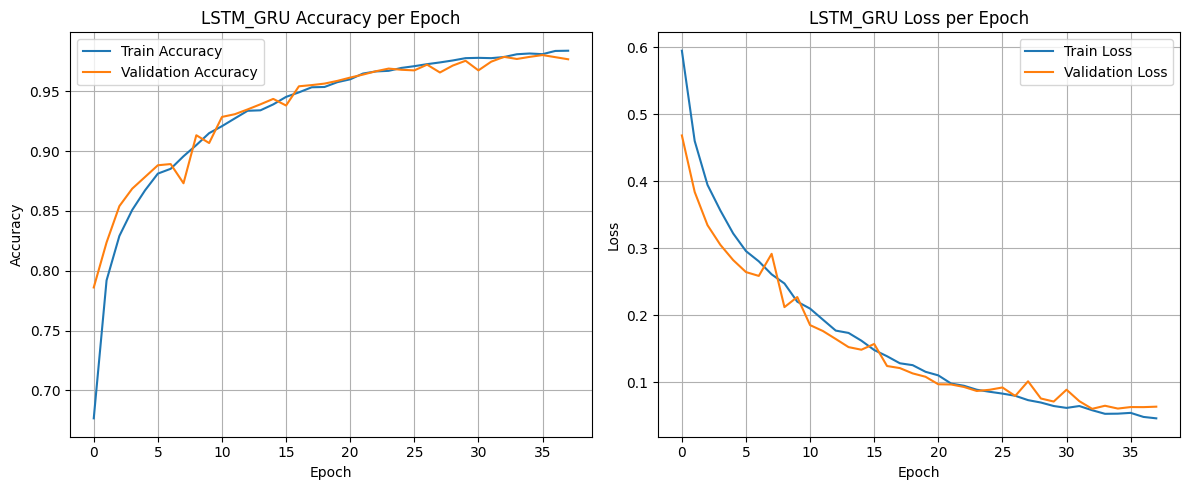


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 0.9826 ± 0.0026
Precision: 0.9835 ± 0.0034
Recall: 0.9817 ± 0.0038
F1: 0.9826 ± 0.0027
Auc: 0.9982 ± 0.0004


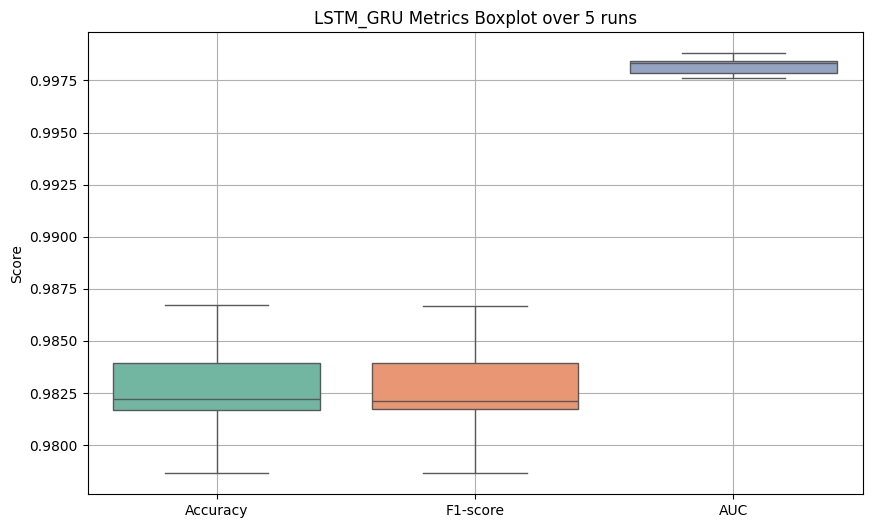


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6408 - loss: 0.6350 - val_accuracy: 0.7780 - val_loss: 0.4438
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7560 - loss: 0.4777 - val_accuracy: 0.8016 - val_loss: 0.3978
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7974 - loss: 0.4206 - val_accuracy: 0.8350 - val_loss: 0.3568
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8161 - loss: 0.3884 - val_accuracy: 0.8410 - val_loss: 0.3255
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8364 - loss: 0.3649 - val_accuracy: 0.8563 - val_loss: 0.3207
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8412 - loss: 0.3432 - val_accuracy: 0.8666 - val_loss: 0.2957
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8526 - loss: 0.3273 - val_accuracy: 0.8746 - val_loss: 0.2848
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accu

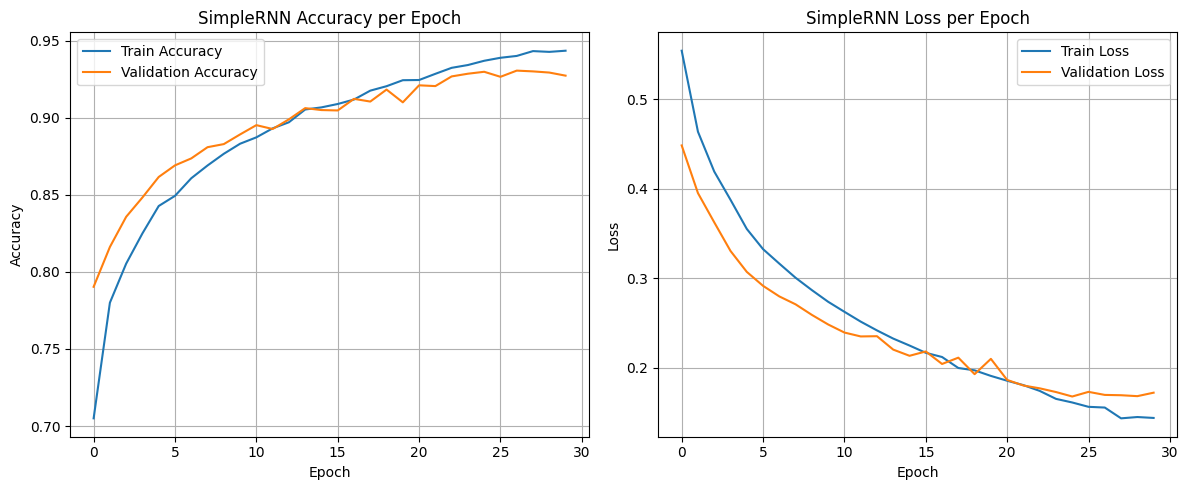


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 0.9462 ± 0.0093
Precision: 0.9585 ± 0.0093
Recall: 0.9328 ± 0.0147
F1: 0.9454 ± 0.0097
Auc: 0.9881 ± 0.0035


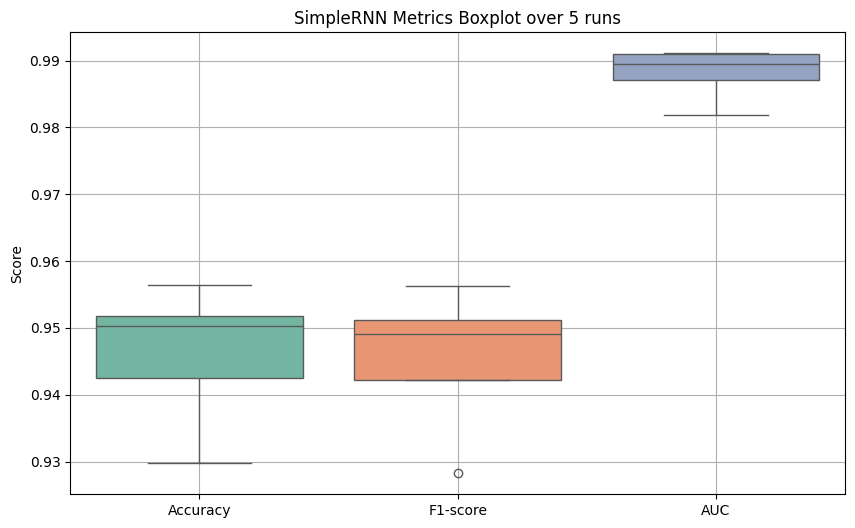


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6139 - loss: 0.6334 - val_accuracy: 0.7565 - val_loss: 0.4846
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7263 - loss: 0.5164 - val_accuracy: 0.7331 - val_loss: 0.4704
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7562 - loss: 0.4828 - val_accuracy: 0.8126 - val_loss: 0.4081
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7824 - loss: 0.4489 - val_accuracy: 0.8232 - val_loss: 0.3870
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7898 - loss: 0.4343 - val_accuracy: 0.8139 - val_loss: 0.3893
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8031 - loss: 0.4201 - val_accuracy: 0.8330 - val_loss: 0.3601
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8282 - loss: 0.3906 - val_accuracy: 0.8475 - val_loss: 0.3601
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy

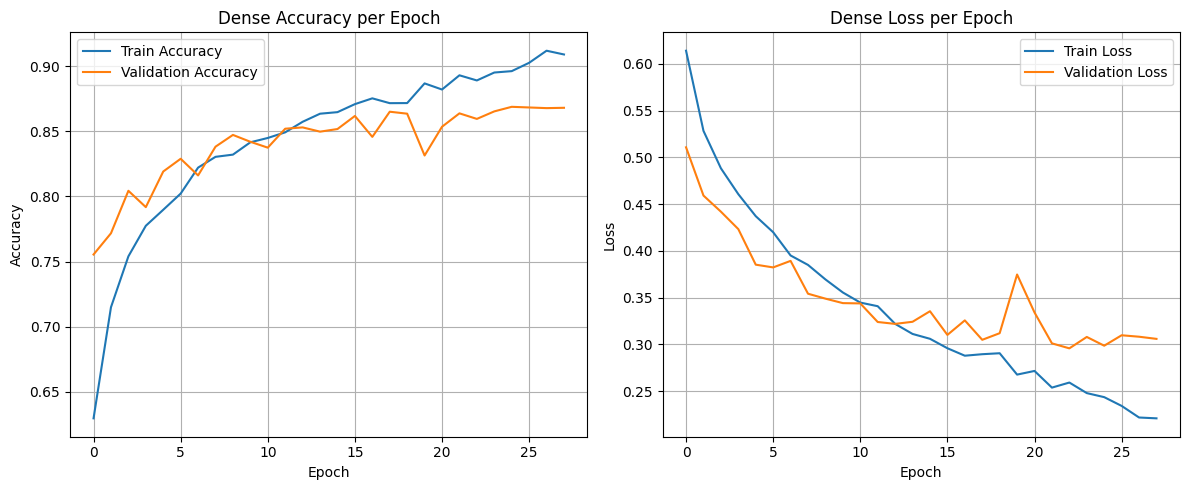


==== Summary for Dense (over 5 runs) ====
Accuracy: 0.8718 ± 0.0083
Precision: 0.9066 ± 0.0084
Recall: 0.8292 ± 0.0249
F1: 0.8659 ± 0.0109
Auc: 0.9461 ± 0.0046


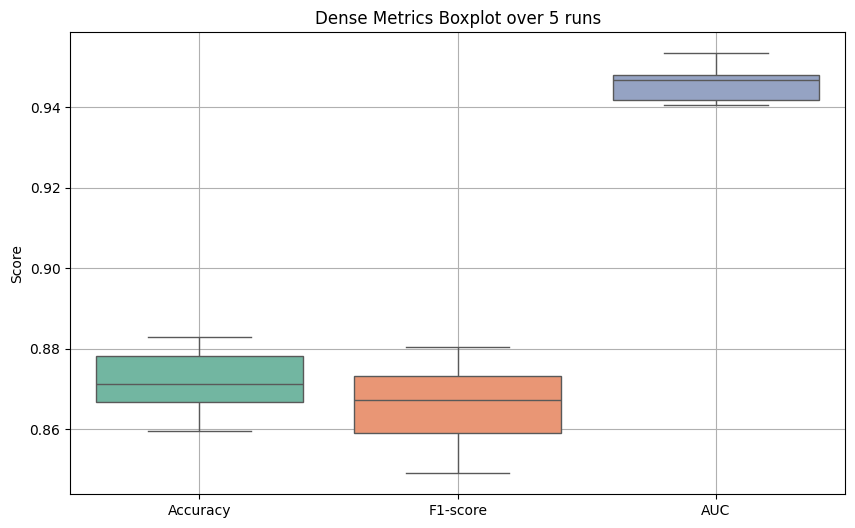


All run results saved to: /content/drive/MyDrive/ped1/results_all_models_repvgg_a0.csv


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'repvgg_a0'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/ped1'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6524 - loss: 0.5918 - val_accuracy: 0.7998 - val_loss: 0.4330
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7801 - loss: 0.4534 - val_accuracy: 0.8192 - val_loss: 0.3896
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8148 - loss: 0.4098 - val_accuracy: 0.8357 - val_loss: 0.3552
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8298 - loss: 0.3761 - val_accuracy: 0.8488 - val_loss: 0.3387
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8468 - loss: 0.3501 - val_accuracy: 0.8585 - val_loss: 0.3199
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8538 - loss: 0.3323 - val_accuracy: 0.8666 - val_loss: 0.2981
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8682 - loss: 0.3129 - val_accuracy: 0.8758 - val_loss: 0.2866
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy:

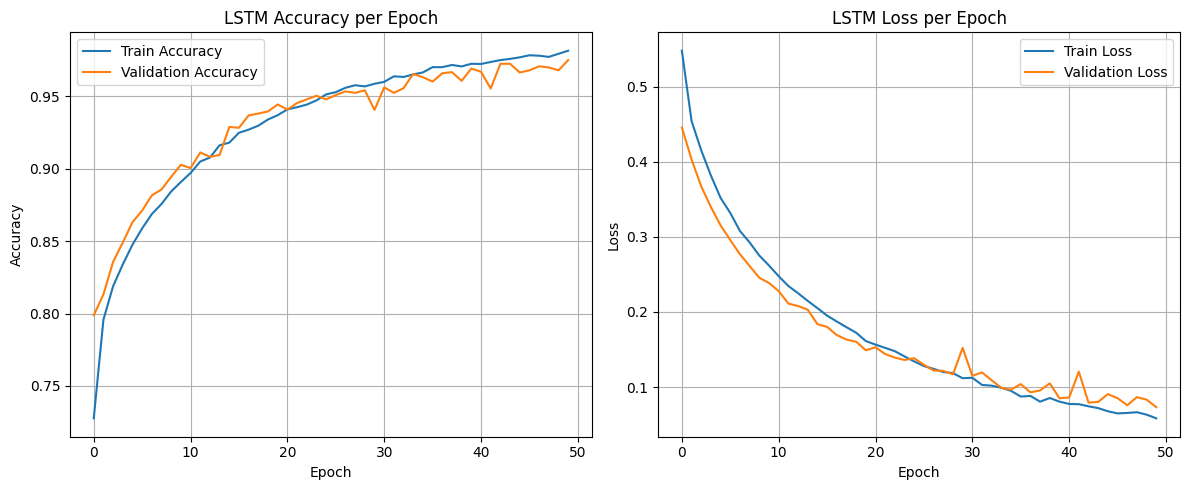


==== Summary for LSTM (over 5 runs) ====
Accuracy: 0.9739 ± 0.0019
Precision: 0.9761 ± 0.0023
Recall: 0.9715 ± 0.0039
F1: 0.9738 ± 0.0020
Auc: 0.9964 ± 0.0003


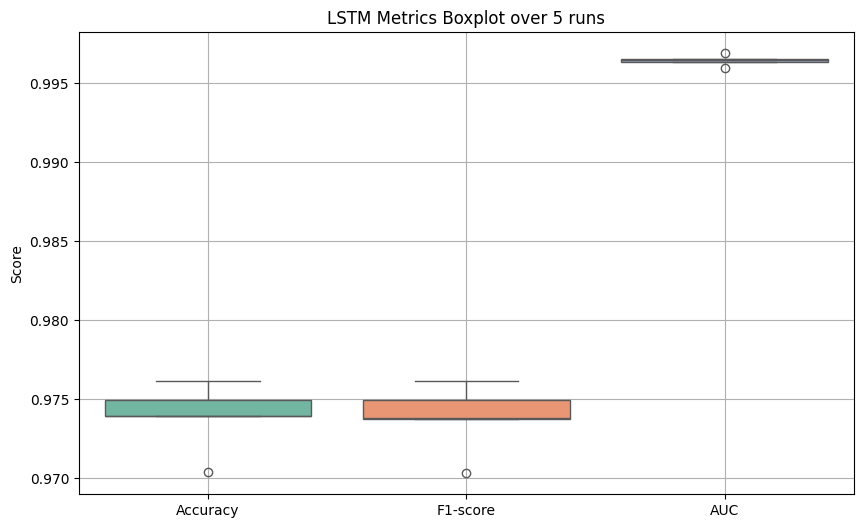


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6471 - loss: 0.6143 - val_accuracy: 0.7941 - val_loss: 0.4517
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7789 - loss: 0.4755 - val_accuracy: 0.8164 - val_loss: 0.4008
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8048 - loss: 0.4209 - val_accuracy: 0.8307 - val_loss: 0.3707
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8223 - loss: 0.3829 - val_accuracy: 0.8422 - val_loss: 0.3403
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8333 - loss: 0.3623 - val_accuracy: 0.8505 - val_loss: 0.3235
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8473 - loss: 0.3387 - val_accuracy: 0.8603 - val_loss: 0.3080
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8521 - loss: 0.3289 - val_accuracy: 0.8688 - val_loss: 0.2916
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 

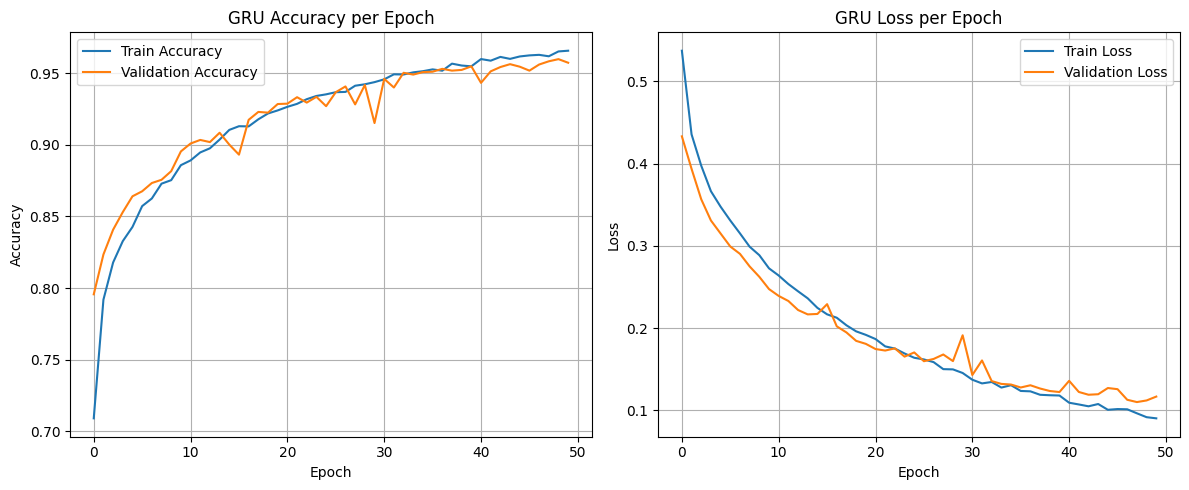


==== Summary for GRU (over 5 runs) ====
Accuracy: 0.9590 ± 0.0053
Precision: 0.9604 ± 0.0020
Recall: 0.9575 ± 0.0107
F1: 0.9589 ± 0.0056
Auc: 0.9924 ± 0.0017


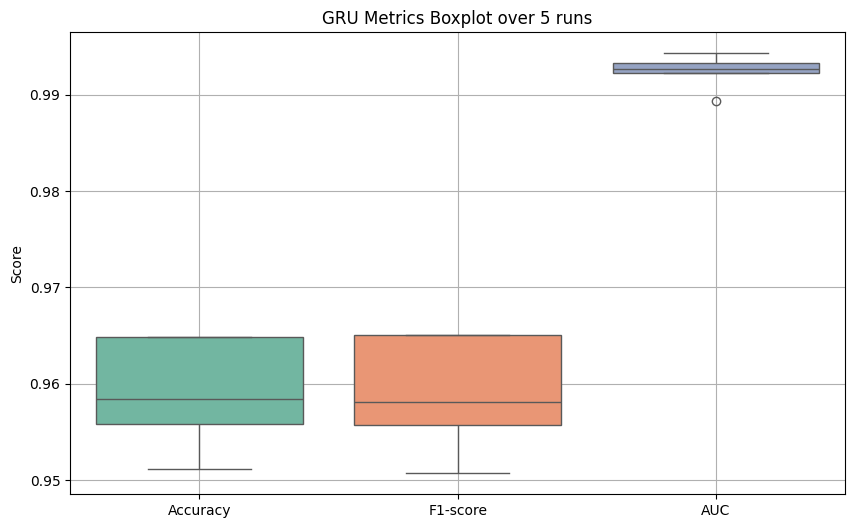


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6011 - loss: 0.6519 - val_accuracy: 0.8014 - val_loss: 0.4738
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7720 - loss: 0.4915 - val_accuracy: 0.8217 - val_loss: 0.3980
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8108 - loss: 0.4250 - val_accuracy: 0.8382 - val_loss: 0.3566
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8363 - loss: 0.3731 - val_accuracy: 0.8530 - val_loss: 0.3311
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8517 - loss: 0.3416 - val_accuracy: 0.8623 - val_loss: 0.3097
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8636 - loss: 0.3203 - val_accuracy: 0.8681 - val_loss: 0.3049
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8685 - loss: 0.3136 - val_accuracy: 0.8819 - val_loss: 0.2775
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - acc

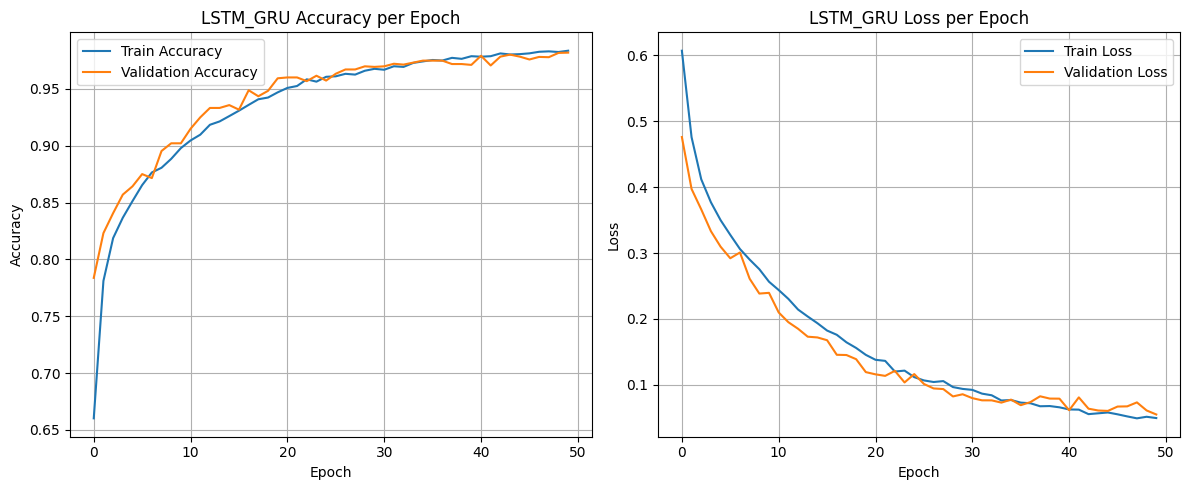


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 0.9797 ± 0.0023
Precision: 0.9786 ± 0.0039
Recall: 0.9809 ± 0.0014
F1: 0.9798 ± 0.0023
Auc: 0.9975 ± 0.0003


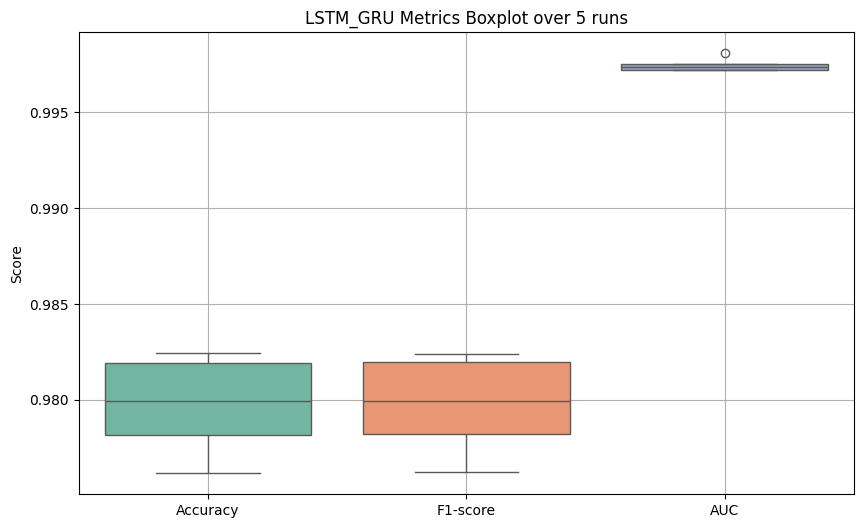


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6464 - loss: 0.6104 - val_accuracy: 0.7840 - val_loss: 0.4385
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7624 - loss: 0.4781 - val_accuracy: 0.8121 - val_loss: 0.3951
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7957 - loss: 0.4328 - val_accuracy: 0.8267 - val_loss: 0.3744
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8099 - loss: 0.4130 - val_accuracy: 0.8352 - val_loss: 0.3593
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8214 - loss: 0.3915 - val_accuracy: 0.8420 - val_loss: 0.3428
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8368 - loss: 0.3656 - val_accuracy: 0.8435 - val_loss: 0.3379
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8456 - loss: 0.3501 - val_accuracy: 0.8553 - val_loss: 0.3183
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accu

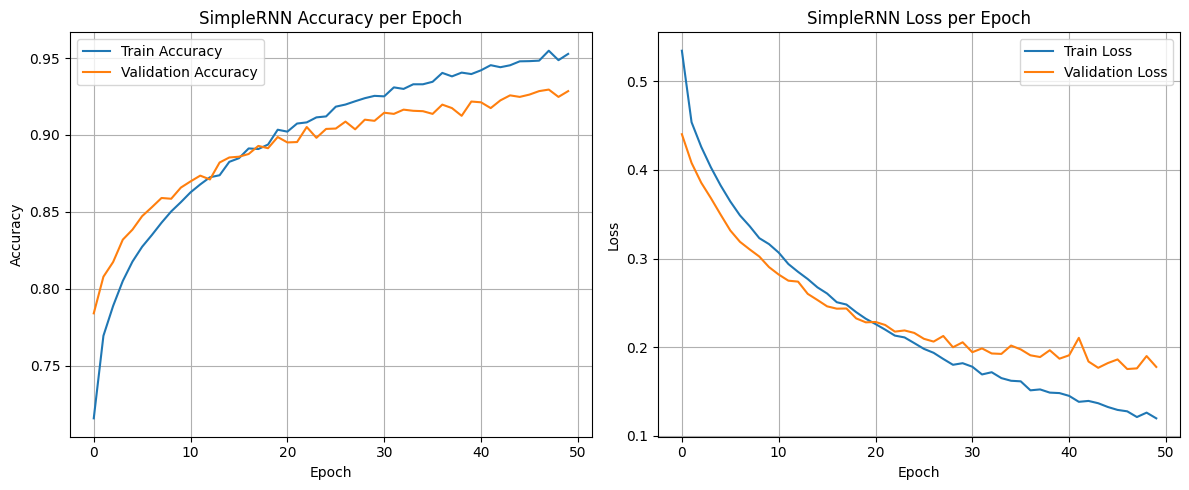


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 0.9276 ± 0.0036
Precision: 0.9334 ± 0.0068
Recall: 0.9208 ± 0.0072
F1: 0.9271 ± 0.0036
Auc: 0.9813 ± 0.0024


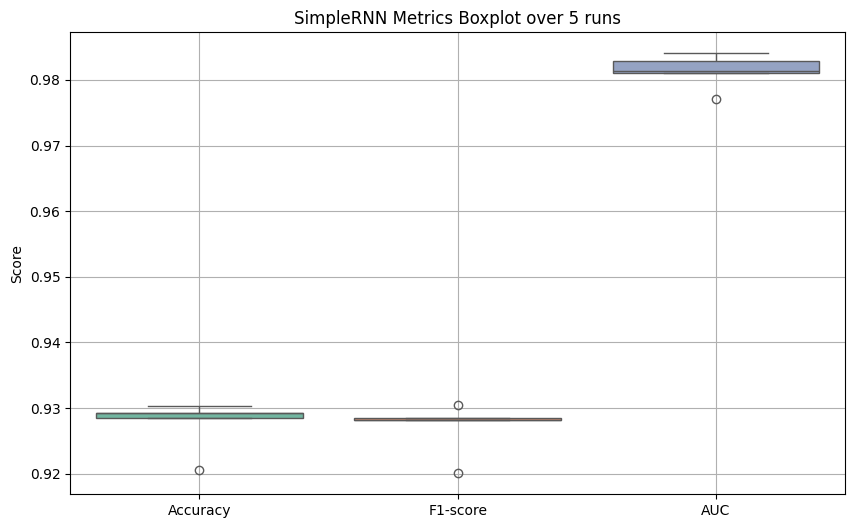


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5841 - loss: 0.6655 - val_accuracy: 0.7517 - val_loss: 0.4936
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7269 - loss: 0.5193 - val_accuracy: 0.7677 - val_loss: 0.4503
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7537 - loss: 0.4725 - val_accuracy: 0.7958 - val_loss: 0.4217
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7809 - loss: 0.4514 - val_accuracy: 0.7993 - val_loss: 0.4110
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7834 - loss: 0.4386 - val_accuracy: 0.8041 - val_loss: 0.3937
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7932 - loss: 0.4253 - val_accuracy: 0.7998 - val_loss: 0.3944
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8098 - loss: 0.4066 - val_accuracy: 0.8254 - val_loss: 0.3685
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy

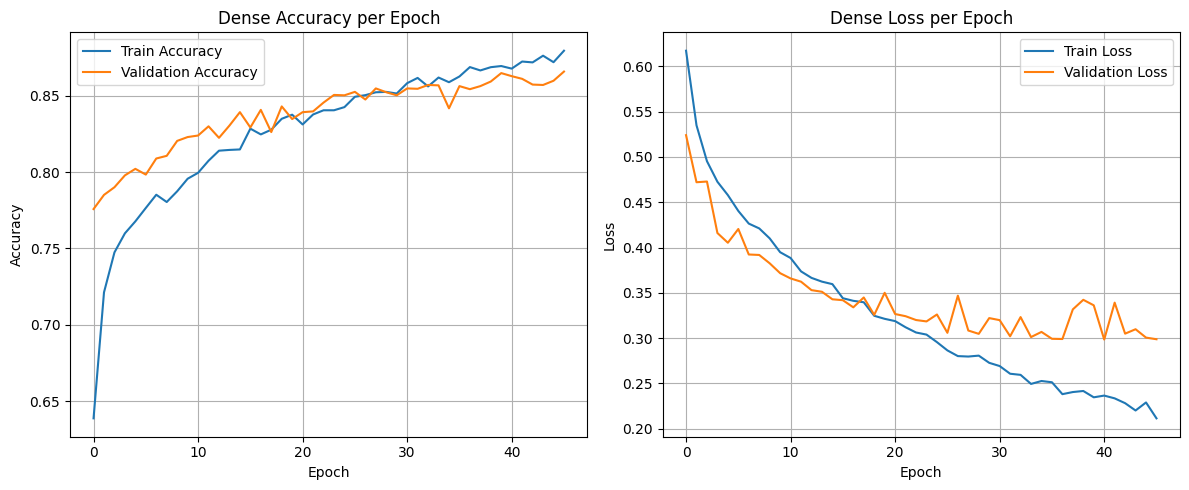


==== Summary for Dense (over 5 runs) ====
Accuracy: 0.8610 ± 0.0053
Precision: 0.8978 ± 0.0129
Recall: 0.8153 ± 0.0217
F1: 0.8542 ± 0.0076
Auc: 0.9413 ± 0.0045


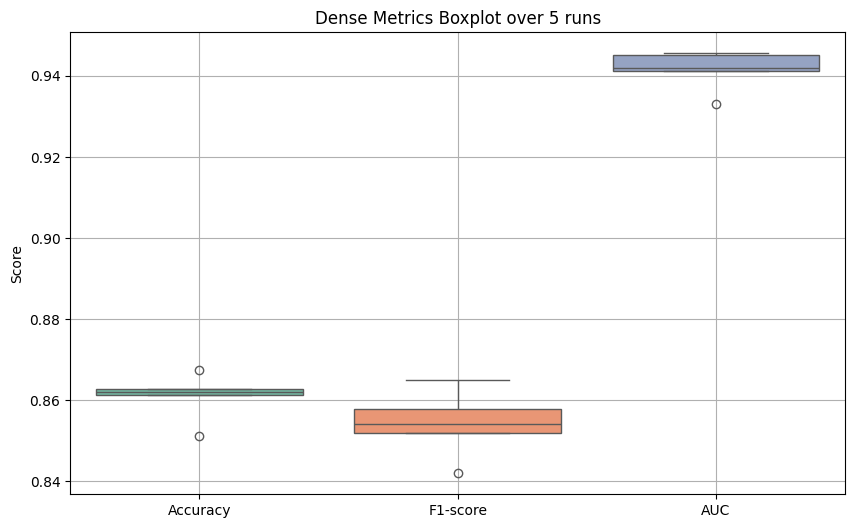


All run results saved to: /content/drive/MyDrive/ped1/results_all_models_mobileone_s0.csv


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'mobileone_s0'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/ped1'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6488 - loss: 0.6194 - val_accuracy: 0.7913 - val_loss: 0.4516
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7720 - loss: 0.4742 - val_accuracy: 0.8144 - val_loss: 0.3918
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8032 - loss: 0.4218 - val_accuracy: 0.8357 - val_loss: 0.3599
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8162 - loss: 0.3859 - val_accuracy: 0.8415 - val_loss: 0.3419
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8317 - loss: 0.3677 - val_accuracy: 0.8505 - val_loss: 0.3251
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8488 - loss: 0.3364 - val_accuracy: 0.8575 - val_loss: 0.3155
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8526 - loss: 0.3318 - val_accuracy: 0.8603 - val_loss: 0.3036
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy:

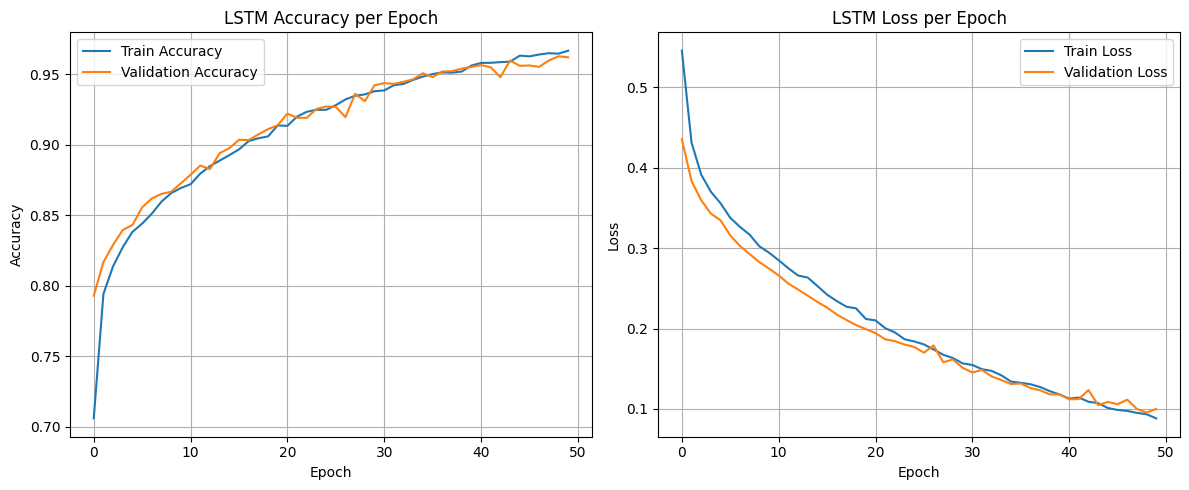


==== Summary for LSTM (over 5 runs) ====
Accuracy: 0.9605 ± 0.0018
Precision: 0.9699 ± 0.0055
Recall: 0.9506 ± 0.0075
F1: 0.9601 ± 0.0020
Auc: 0.9933 ± 0.0012


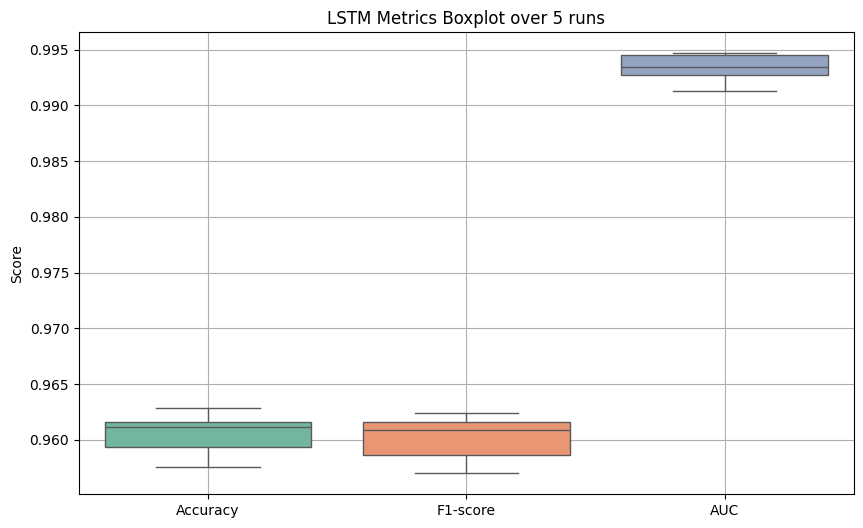


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6237 - loss: 0.6255 - val_accuracy: 0.7978 - val_loss: 0.4293
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7752 - loss: 0.4502 - val_accuracy: 0.8189 - val_loss: 0.3845
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8034 - loss: 0.4092 - val_accuracy: 0.8307 - val_loss: 0.3574
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8207 - loss: 0.3752 - val_accuracy: 0.8415 - val_loss: 0.3397
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8329 - loss: 0.3527 - val_accuracy: 0.8463 - val_loss: 0.3239
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8366 - loss: 0.3486 - val_accuracy: 0.8518 - val_loss: 0.3139
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8433 - loss: 0.3313 - val_accuracy: 0.8588 - val_loss: 0.3057
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 

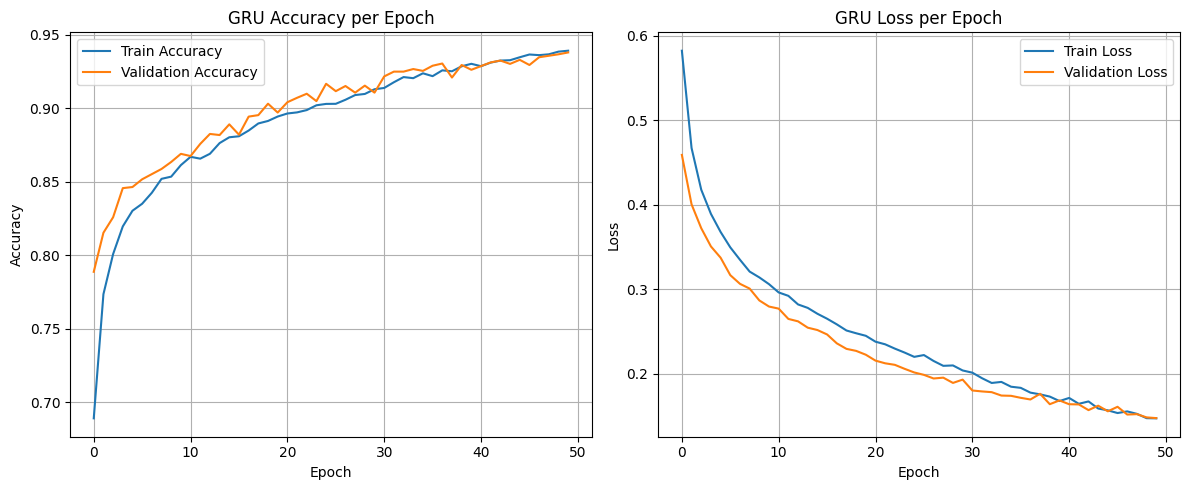


==== Summary for GRU (over 5 runs) ====
Accuracy: 0.9352 ± 0.0062
Precision: 0.9399 ± 0.0065
Recall: 0.9300 ± 0.0129
F1: 0.9348 ± 0.0066
Auc: 0.9853 ± 0.0025


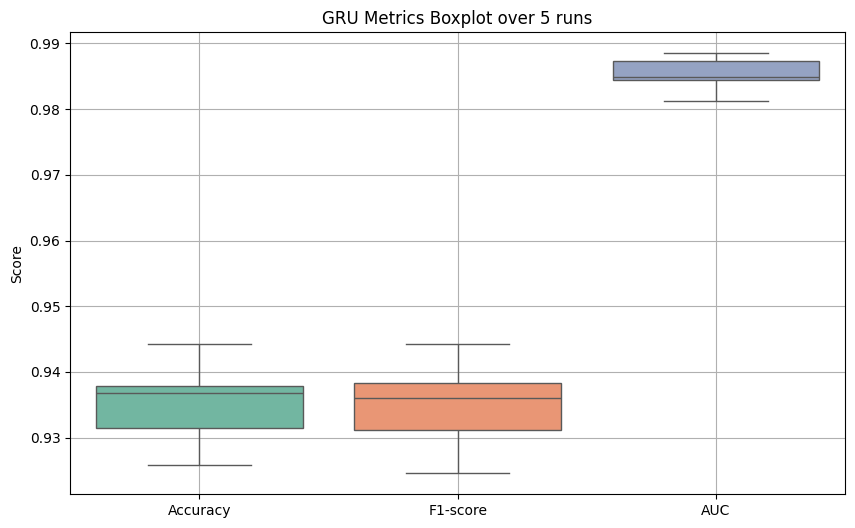


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5589 - loss: 0.6784 - val_accuracy: 0.7861 - val_loss: 0.5156
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7618 - loss: 0.5242 - val_accuracy: 0.8177 - val_loss: 0.4098
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7971 - loss: 0.4572 - val_accuracy: 0.8412 - val_loss: 0.3659
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8200 - loss: 0.4033 - val_accuracy: 0.8483 - val_loss: 0.3442
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8378 - loss: 0.3799 - val_accuracy: 0.8475 - val_loss: 0.3390
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8448 - loss: 0.3636 - val_accuracy: 0.8610 - val_loss: 0.3208
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8474 - loss: 0.3512 - val_accuracy: 0.8613 - val_loss: 0.3152
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accu

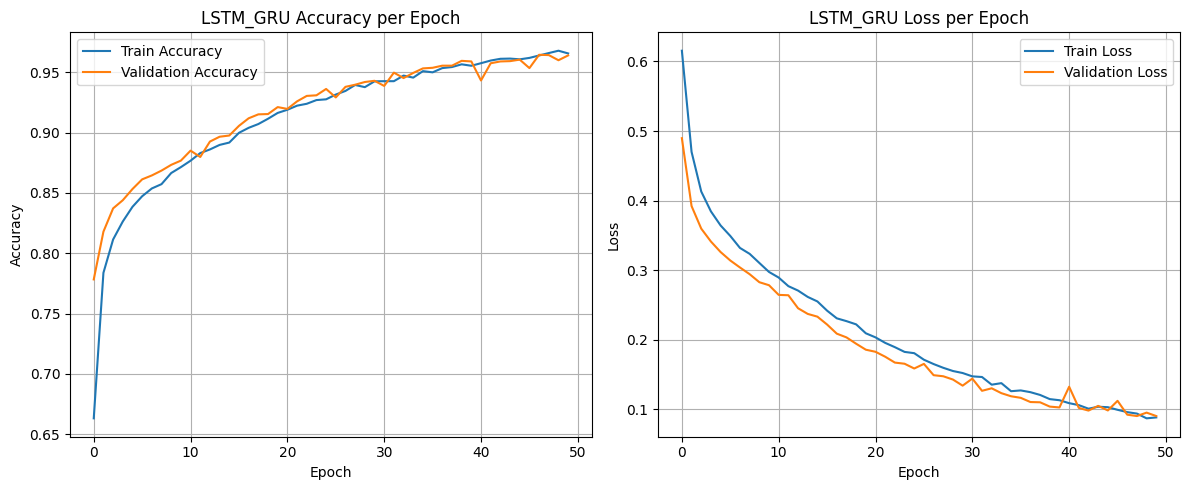


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 0.9631 ± 0.0026
Precision: 0.9653 ± 0.0084
Recall: 0.9609 ± 0.0110
F1: 0.9630 ± 0.0028
Auc: 0.9942 ± 0.0008


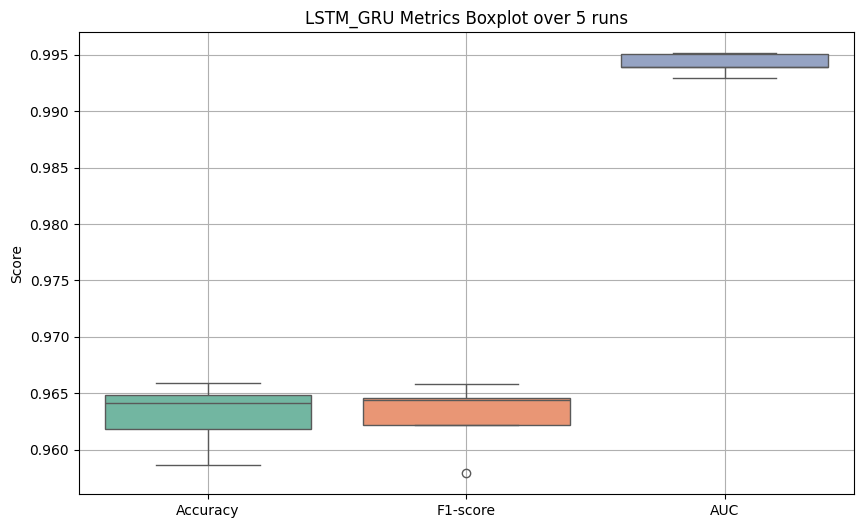


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6396 - loss: 0.6314 - val_accuracy: 0.7800 - val_loss: 0.4634
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7569 - loss: 0.4874 - val_accuracy: 0.7988 - val_loss: 0.4173
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7909 - loss: 0.4438 - val_accuracy: 0.8172 - val_loss: 0.3862
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8034 - loss: 0.4132 - val_accuracy: 0.8249 - val_loss: 0.3732
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8107 - loss: 0.4001 - val_accuracy: 0.8307 - val_loss: 0.3545
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8299 - loss: 0.3782 - val_accuracy: 0.8355 - val_loss: 0.3455
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8338 - loss: 0.3595 - val_accuracy: 0.8410 - val_loss: 0.3381
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accu

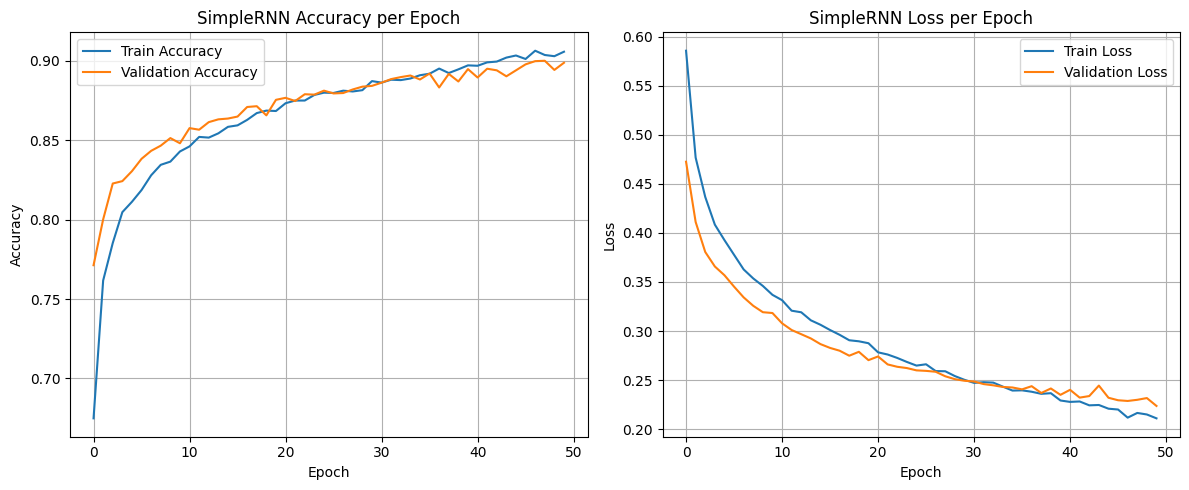


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 0.8974 ± 0.0050
Precision: 0.9234 ± 0.0079
Recall: 0.8668 ± 0.0123
F1: 0.8941 ± 0.0057
Auc: 0.9658 ± 0.0021


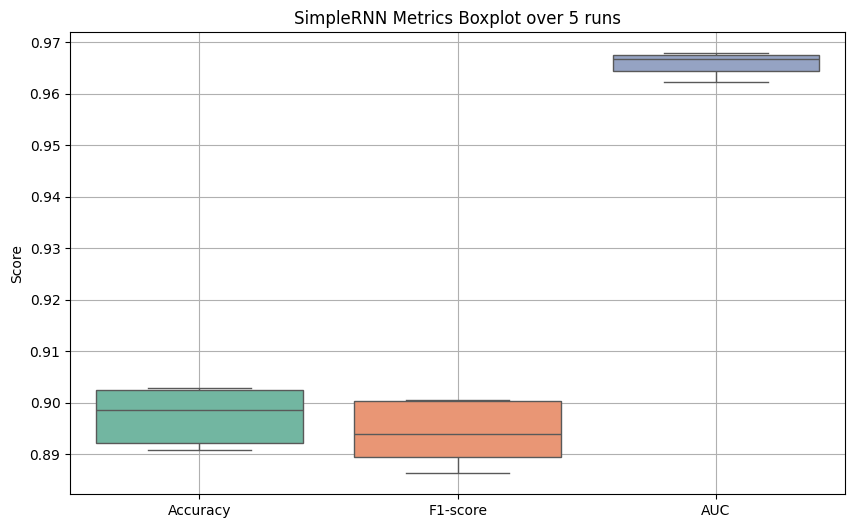


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5891 - loss: 0.6558 - val_accuracy: 0.7642 - val_loss: 0.4742
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7215 - loss: 0.5274 - val_accuracy: 0.7911 - val_loss: 0.4305
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7673 - loss: 0.4683 - val_accuracy: 0.7906 - val_loss: 0.4077
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7868 - loss: 0.4403 - val_accuracy: 0.8086 - val_loss: 0.3844
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8022 - loss: 0.4162 - val_accuracy: 0.8189 - val_loss: 0.3796
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8117 - loss: 0.3940 - val_accuracy: 0.8207 - val_loss: 0.3622
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8190 - loss: 0.3827 - val_accuracy: 0.8264 - val_loss: 0.3554
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy

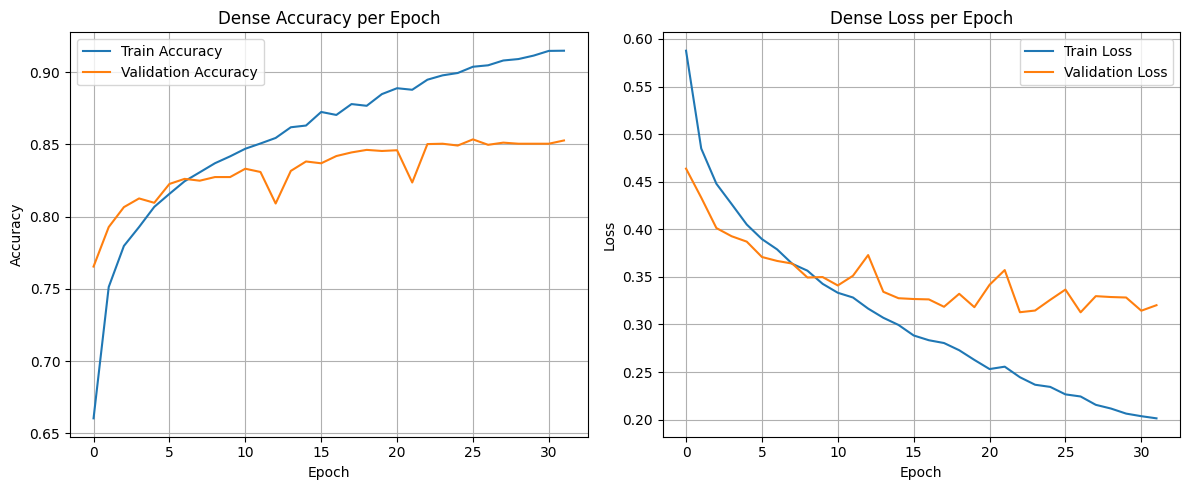


==== Summary for Dense (over 5 runs) ====
Accuracy: 0.8497 ± 0.0049
Precision: 0.8942 ± 0.0071
Recall: 0.7934 ± 0.0133
F1: 0.8407 ± 0.0063
Auc: 0.9322 ± 0.0033


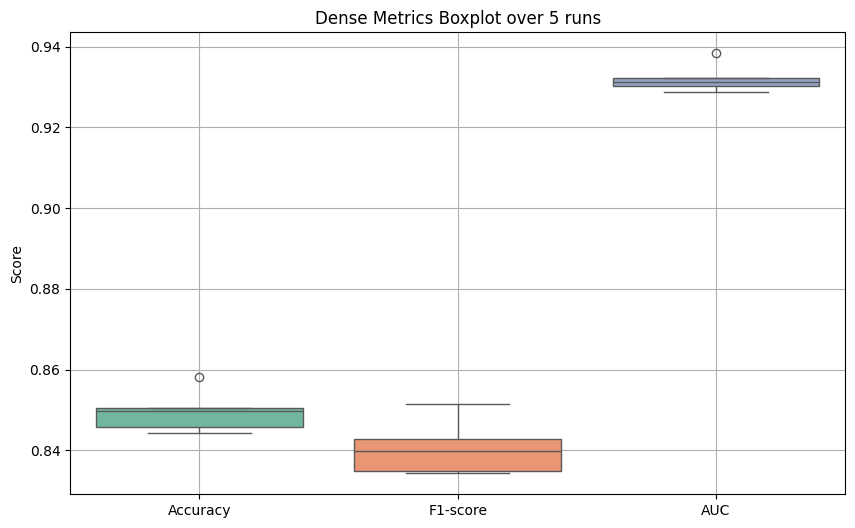


All run results saved to: /content/drive/MyDrive/ped1/results_all_models_poolformer_s12.csv


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'poolformer_s12'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/ped1'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6191 - loss: 0.6352 - val_accuracy: 0.7835 - val_loss: 0.4716
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7592 - loss: 0.4962 - val_accuracy: 0.8034 - val_loss: 0.4180
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7920 - loss: 0.4431 - val_accuracy: 0.8207 - val_loss: 0.3913
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8153 - loss: 0.4031 - val_accuracy: 0.8269 - val_loss: 0.3737
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8255 - loss: 0.3865 - val_accuracy: 0.8330 - val_loss: 0.3602
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8277 - loss: 0.3727 - val_accuracy: 0.8460 - val_loss: 0.3484
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8357 - loss: 0.3663 - val_accuracy: 0.8468 - val_loss: 0.3422
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy:

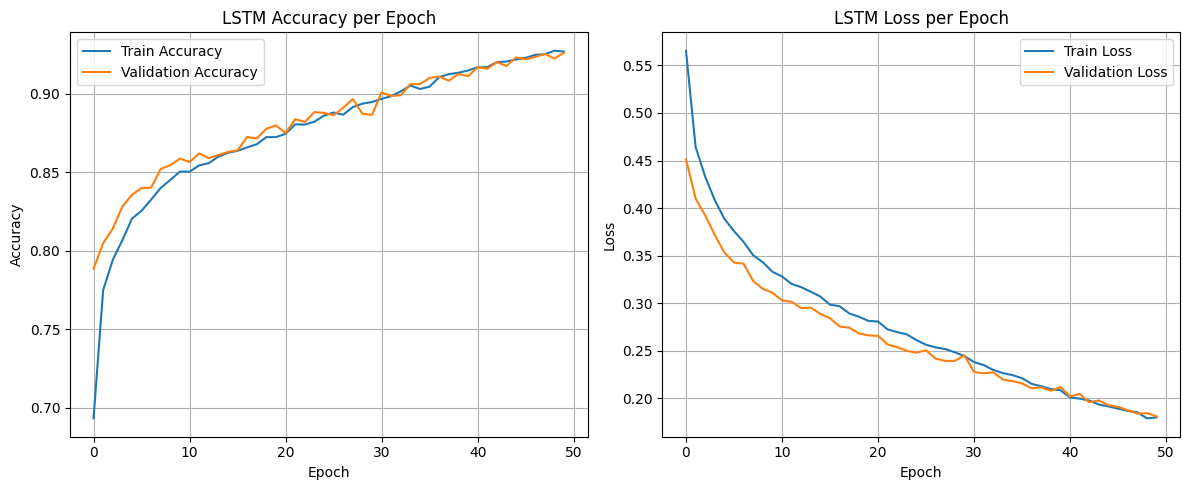


==== Summary for LSTM (over 5 runs) ====
Accuracy: 0.9208 ± 0.0060
Precision: 0.9265 ± 0.0089
Recall: 0.9142 ± 0.0062
F1: 0.9203 ± 0.0058
Auc: 0.9785 ± 0.0032


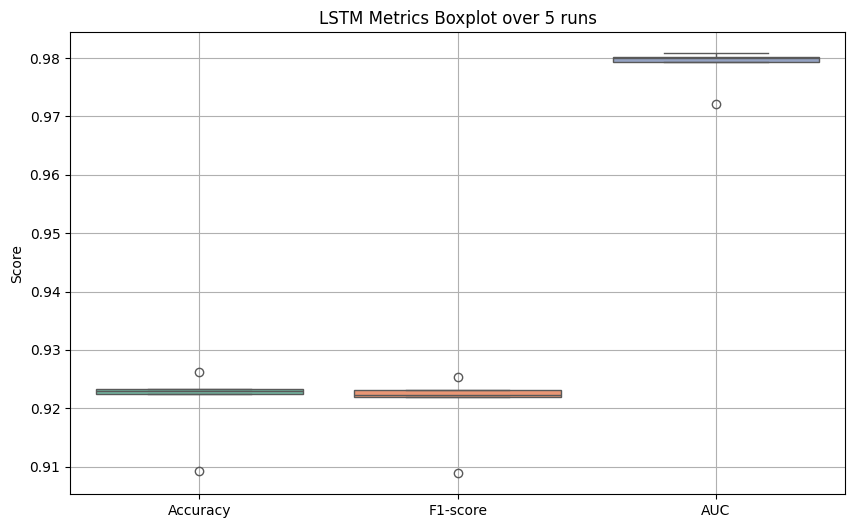


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6260 - loss: 0.6288 - val_accuracy: 0.7938 - val_loss: 0.4341
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7831 - loss: 0.4529 - val_accuracy: 0.8121 - val_loss: 0.4029
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8054 - loss: 0.4149 - val_accuracy: 0.8214 - val_loss: 0.3761
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8144 - loss: 0.3967 - val_accuracy: 0.8317 - val_loss: 0.3605
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8297 - loss: 0.3753 - val_accuracy: 0.8397 - val_loss: 0.3479
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8320 - loss: 0.3629 - val_accuracy: 0.8460 - val_loss: 0.3342
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8386 - loss: 0.3564 - val_accuracy: 0.8580 - val_loss: 0.3273
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 

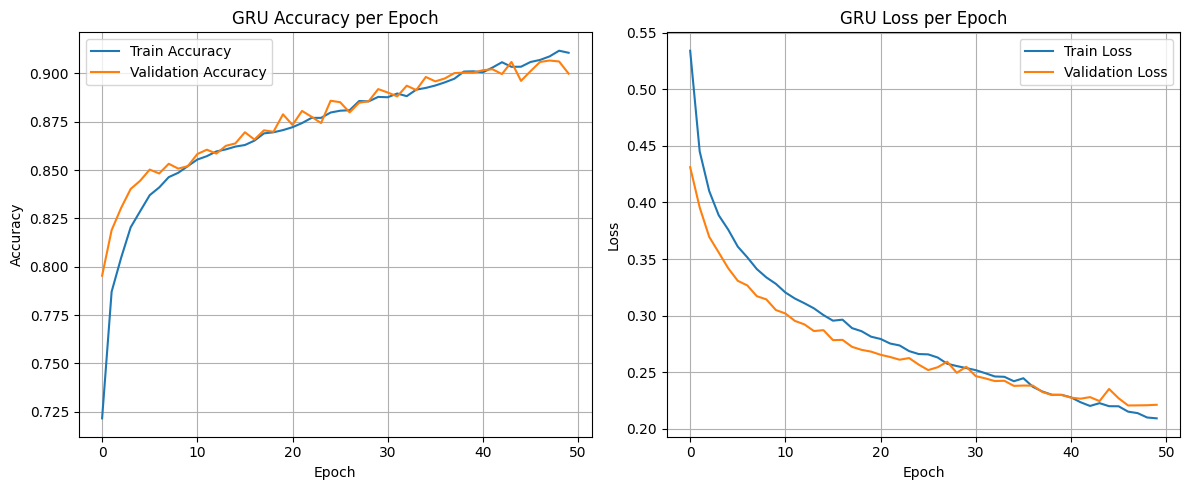


==== Summary for GRU (over 5 runs) ====
Accuracy: 0.9077 ± 0.0039
Precision: 0.9315 ± 0.0114
Recall: 0.8804 ± 0.0151
F1: 0.9051 ± 0.0045
Auc: 0.9725 ± 0.0018


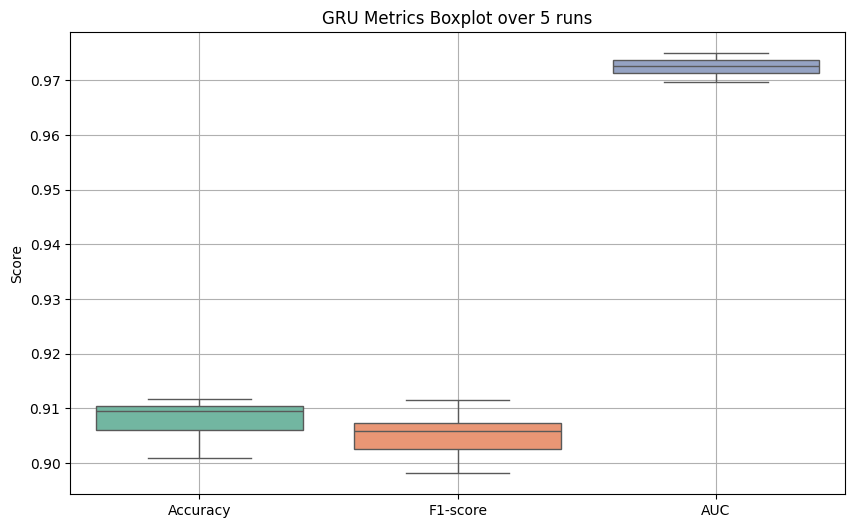


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5887 - loss: 0.6635 - val_accuracy: 0.7886 - val_loss: 0.4871
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7470 - loss: 0.5144 - val_accuracy: 0.7991 - val_loss: 0.4237
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7827 - loss: 0.4622 - val_accuracy: 0.8182 - val_loss: 0.3989
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8067 - loss: 0.4222 - val_accuracy: 0.8297 - val_loss: 0.3771
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8209 - loss: 0.3972 - val_accuracy: 0.8340 - val_loss: 0.3592
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8306 - loss: 0.3807 - val_accuracy: 0.8375 - val_loss: 0.3477
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8366 - loss: 0.3669 - val_accuracy: 0.8367 - val_loss: 0.3437
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accu

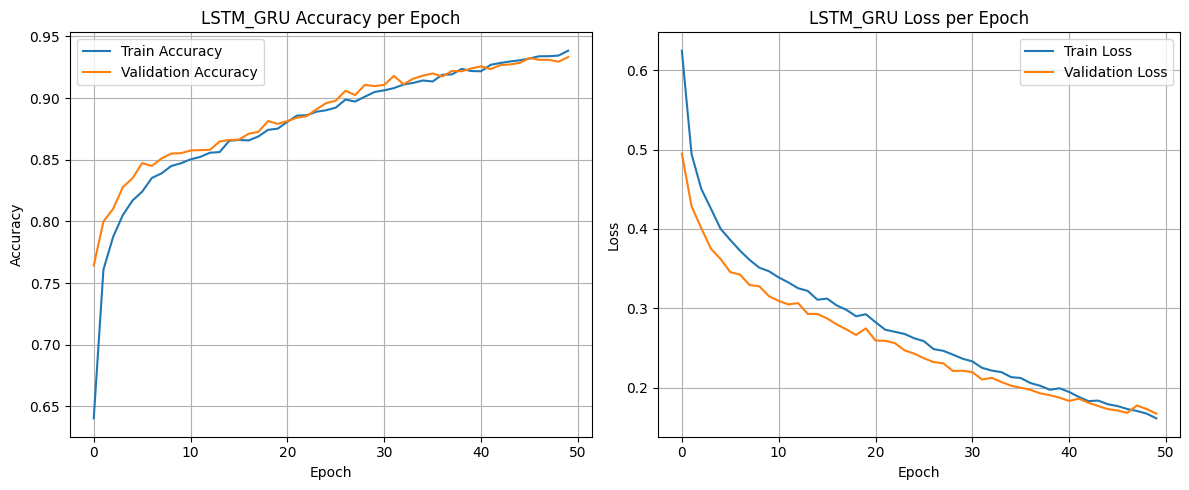


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 0.9276 ± 0.0060
Precision: 0.9399 ± 0.0058
Recall: 0.9137 ± 0.0157
F1: 0.9265 ± 0.0067
Auc: 0.9807 ± 0.0024


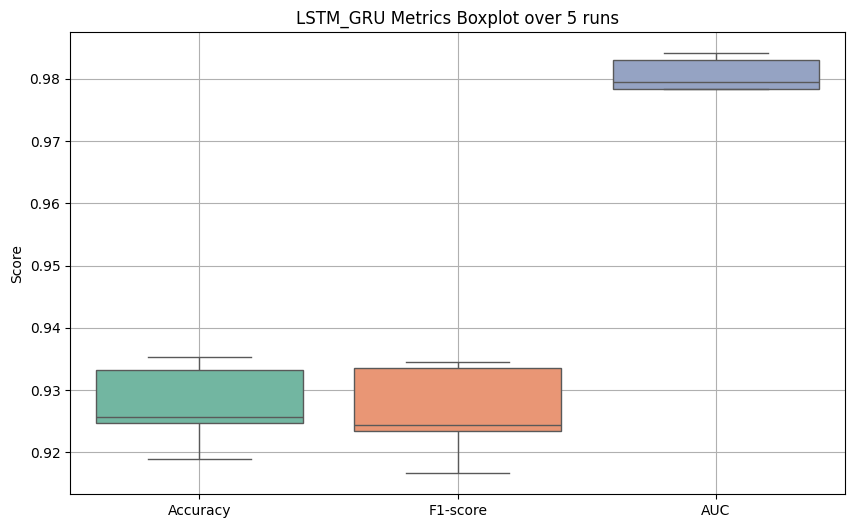


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6286 - loss: 0.6451 - val_accuracy: 0.7728 - val_loss: 0.4603
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7501 - loss: 0.4875 - val_accuracy: 0.7983 - val_loss: 0.4179
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7814 - loss: 0.4463 - val_accuracy: 0.8019 - val_loss: 0.4059
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7884 - loss: 0.4309 - val_accuracy: 0.8076 - val_loss: 0.3949
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7934 - loss: 0.4175 - val_accuracy: 0.8136 - val_loss: 0.3795
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8119 - loss: 0.3999 - val_accuracy: 0.8224 - val_loss: 0.3689
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8167 - loss: 0.3851 - val_accuracy: 0.8237 - val_loss: 0.3608
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accu

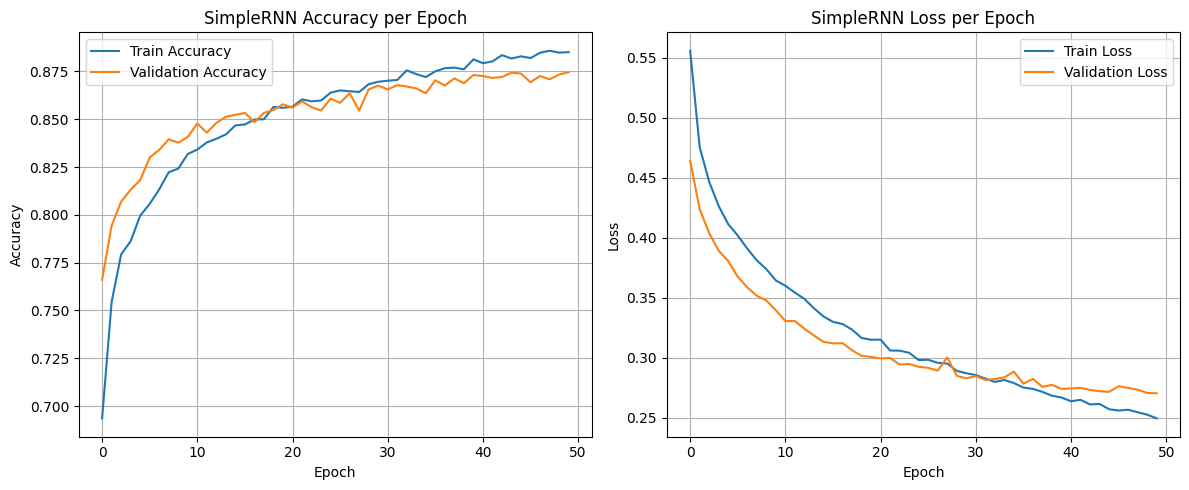


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 0.8766 ± 0.0036
Precision: 0.9186 ± 0.0099
Recall: 0.8266 ± 0.0139
F1: 0.8700 ± 0.0047
Auc: 0.9542 ± 0.0023


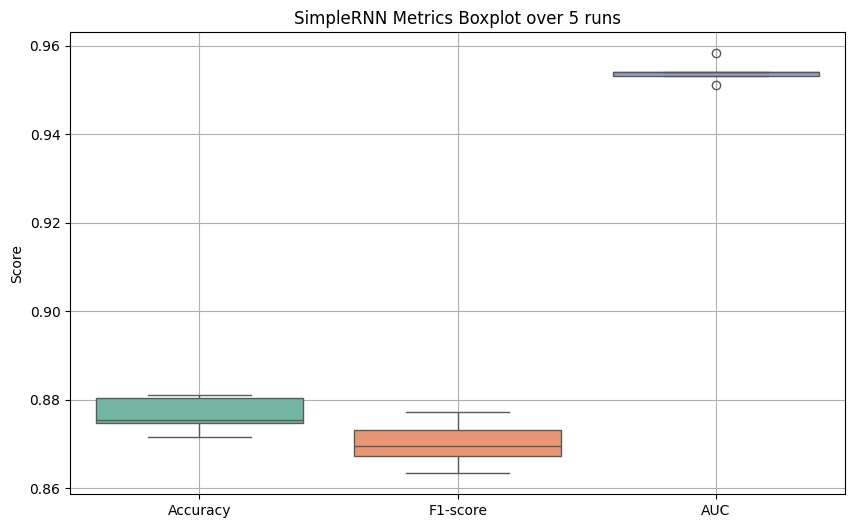


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6525 - loss: 0.6090 - val_accuracy: 0.7838 - val_loss: 0.4494
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7556 - loss: 0.4756 - val_accuracy: 0.7881 - val_loss: 0.4269
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7843 - loss: 0.4421 - val_accuracy: 0.8036 - val_loss: 0.4167
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7866 - loss: 0.4296 - val_accuracy: 0.8084 - val_loss: 0.3938
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7977 - loss: 0.4161 - val_accuracy: 0.8139 - val_loss: 0.3844
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8099 - loss: 0.3966 - val_accuracy: 0.8167 - val_loss: 0.3832
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8212 - loss: 0.3863 - val_accuracy: 0.8202 - val_loss: 0.3734
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy

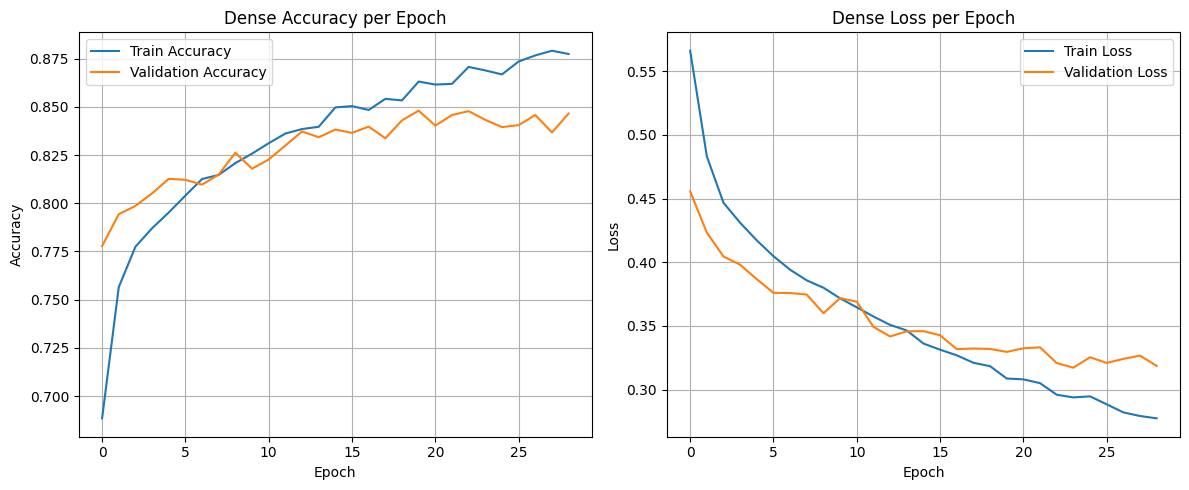


==== Summary for Dense (over 5 runs) ====
Accuracy: 0.8474 ± 0.0038
Precision: 0.8821 ± 0.0143
Recall: 0.8025 ± 0.0150
F1: 0.8402 ± 0.0042
Auc: 0.9321 ± 0.0027


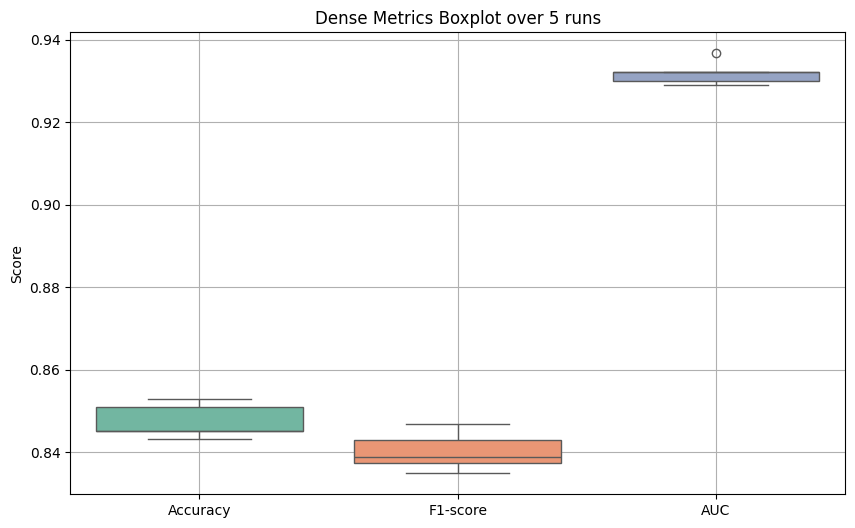


All run results saved to: /content/drive/MyDrive/ped1/results_all_models_maxvit_tiny_tf_224.csv


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'maxvit_tiny_tf_224'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/ped1'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6373 - loss: 0.6085 - val_accuracy: 0.7986 - val_loss: 0.4360
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7676 - loss: 0.4671 - val_accuracy: 0.8162 - val_loss: 0.3919
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8011 - loss: 0.4208 - val_accuracy: 0.8407 - val_loss: 0.3585
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8156 - loss: 0.3946 - val_accuracy: 0.8452 - val_loss: 0.3360
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8240 - loss: 0.3702 - val_accuracy: 0.8548 - val_loss: 0.3211
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8401 - loss: 0.3469 - val_accuracy: 0.8663 - val_loss: 0.3051
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8476 - loss: 0.3326 - val_accuracy: 0.8708 - val_loss: 0.2933
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy:

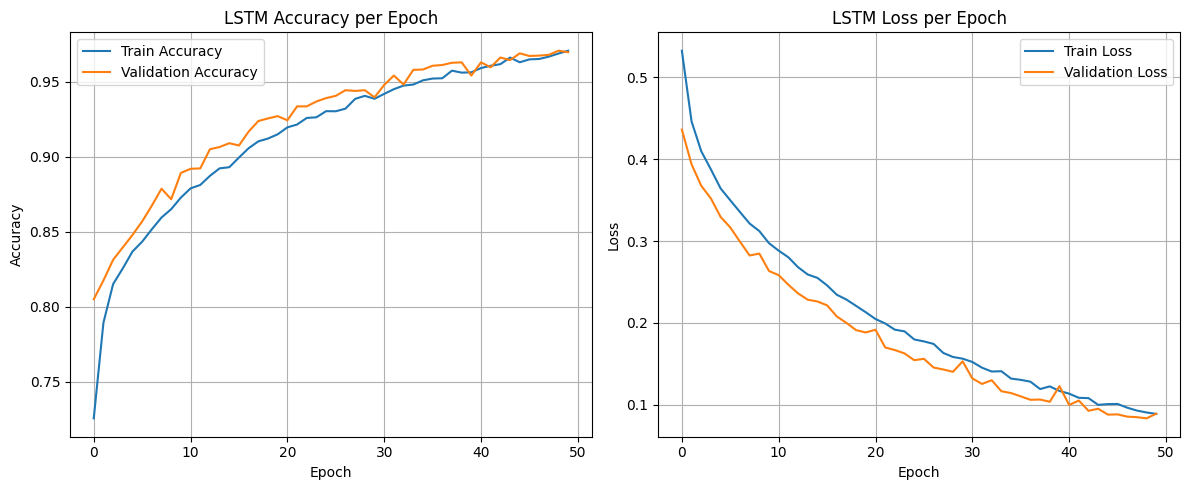


==== Summary for LSTM (over 5 runs) ====
Accuracy: 0.9721 ± 0.0029
Precision: 0.9732 ± 0.0055
Recall: 0.9710 ± 0.0055
F1: 0.9721 ± 0.0029
Auc: 0.9959 ± 0.0007


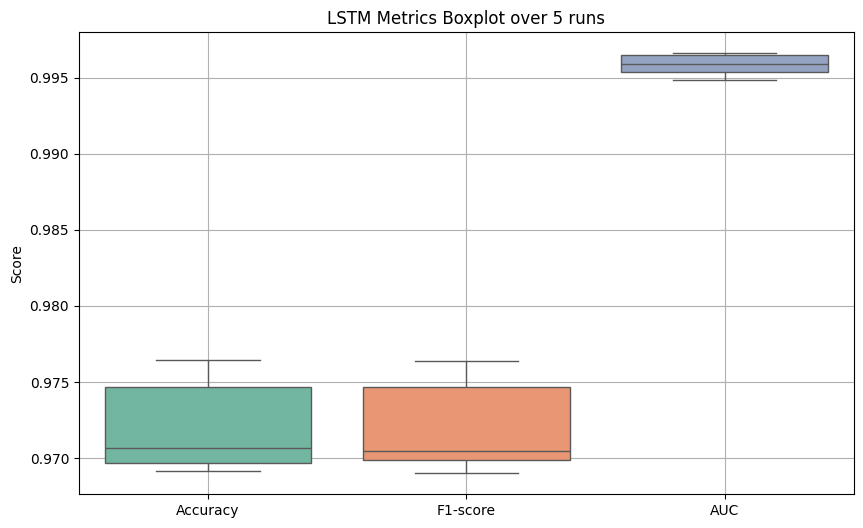


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6683 - loss: 0.5881 - val_accuracy: 0.7976 - val_loss: 0.4226
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7737 - loss: 0.4480 - val_accuracy: 0.8267 - val_loss: 0.3699
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8080 - loss: 0.4016 - val_accuracy: 0.8437 - val_loss: 0.3495
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8230 - loss: 0.3727 - val_accuracy: 0.8498 - val_loss: 0.3247
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8304 - loss: 0.3543 - val_accuracy: 0.8585 - val_loss: 0.3103
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8400 - loss: 0.3423 - val_accuracy: 0.8565 - val_loss: 0.3076
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8570 - loss: 0.3160 - val_accuracy: 0.8713 - val_loss: 0.2896
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 

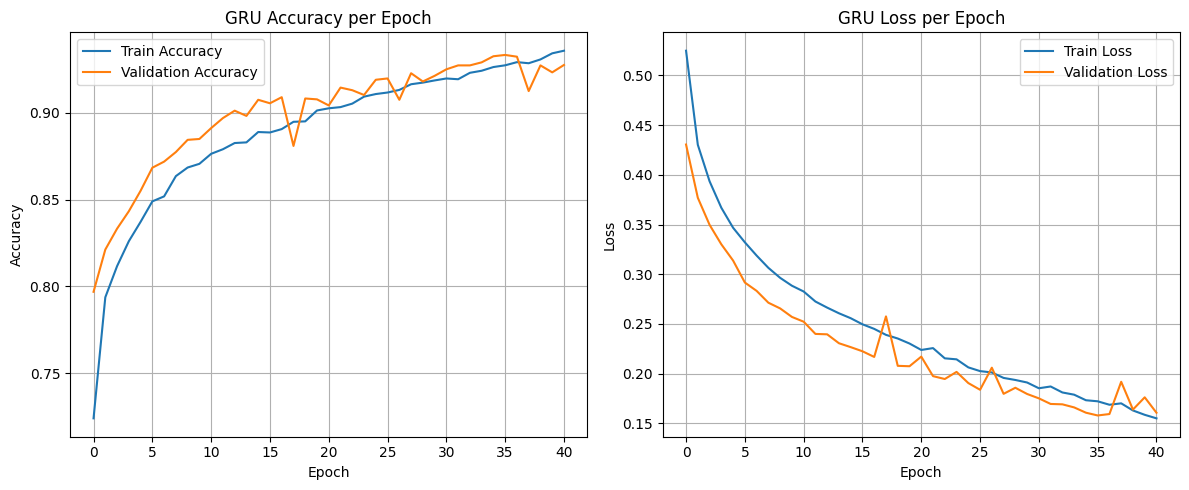


==== Summary for GRU (over 5 runs) ====
Accuracy: 0.9412 ± 0.0048
Precision: 0.9480 ± 0.0054
Recall: 0.9337 ± 0.0089
F1: 0.9407 ± 0.0050
Auc: 0.9876 ± 0.0015


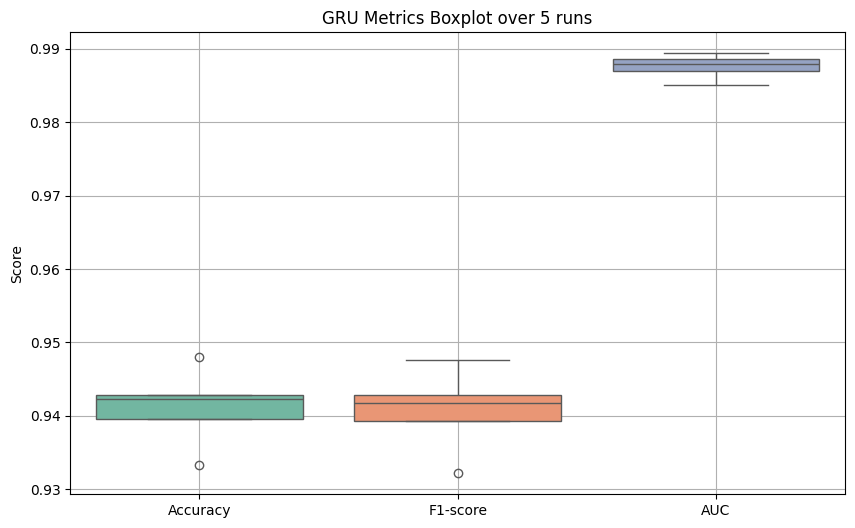


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5901 - loss: 0.6638 - val_accuracy: 0.7873 - val_loss: 0.4873
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7599 - loss: 0.5121 - val_accuracy: 0.8131 - val_loss: 0.4104
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7938 - loss: 0.4420 - val_accuracy: 0.8380 - val_loss: 0.3661
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8114 - loss: 0.4068 - val_accuracy: 0.8473 - val_loss: 0.3423
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8307 - loss: 0.3773 - val_accuracy: 0.8533 - val_loss: 0.3228
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8407 - loss: 0.3582 - val_accuracy: 0.8631 - val_loss: 0.3032
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8608 - loss: 0.3293 - val_accuracy: 0.8753 - val_loss: 0.2865
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step

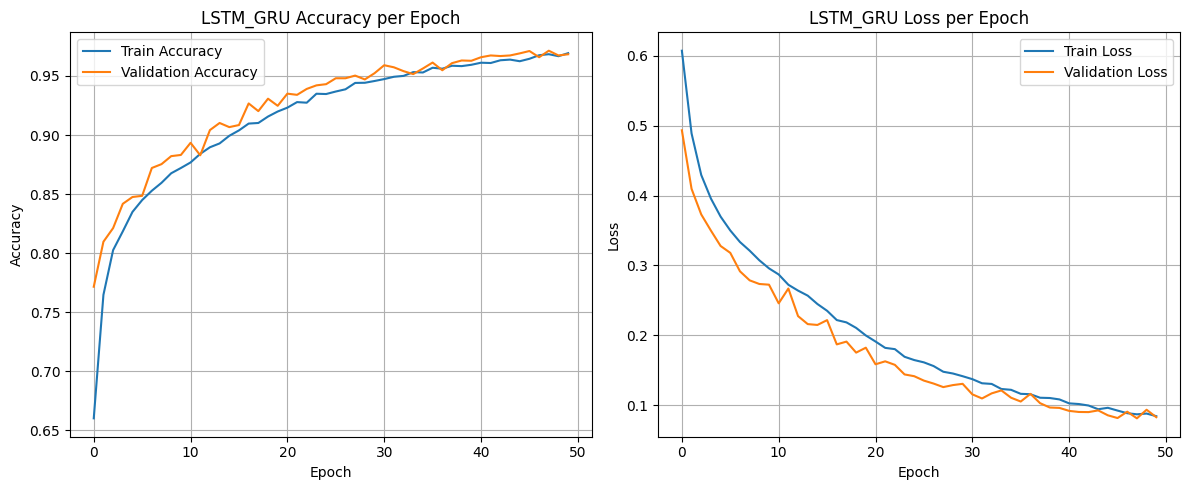


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 0.9726 ± 0.0019
Precision: 0.9754 ± 0.0063
Recall: 0.9697 ± 0.0042
F1: 0.9725 ± 0.0018
Auc: 0.9960 ± 0.0007


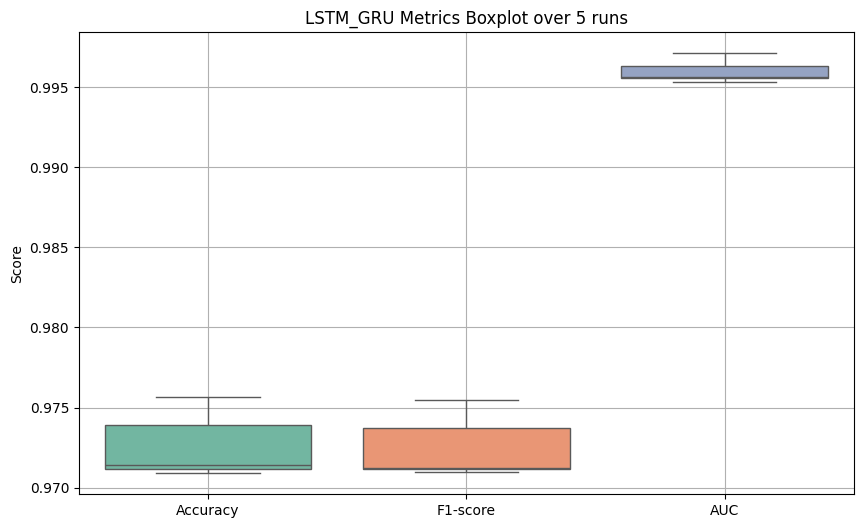


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6180 - loss: 0.6504 - val_accuracy: 0.7760 - val_loss: 0.4591
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7478 - loss: 0.4962 - val_accuracy: 0.7951 - val_loss: 0.4187
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7704 - loss: 0.4604 - val_accuracy: 0.8049 - val_loss: 0.3976
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7844 - loss: 0.4348 - val_accuracy: 0.8224 - val_loss: 0.3746
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8002 - loss: 0.4106 - val_accuracy: 0.8307 - val_loss: 0.3587
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8075 - loss: 0.3927 - val_accuracy: 0.8410 - val_loss: 0.3443
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8140 - loss: 0.3790 - val_accuracy: 0.8372 - val_loss: 0.3402
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accu

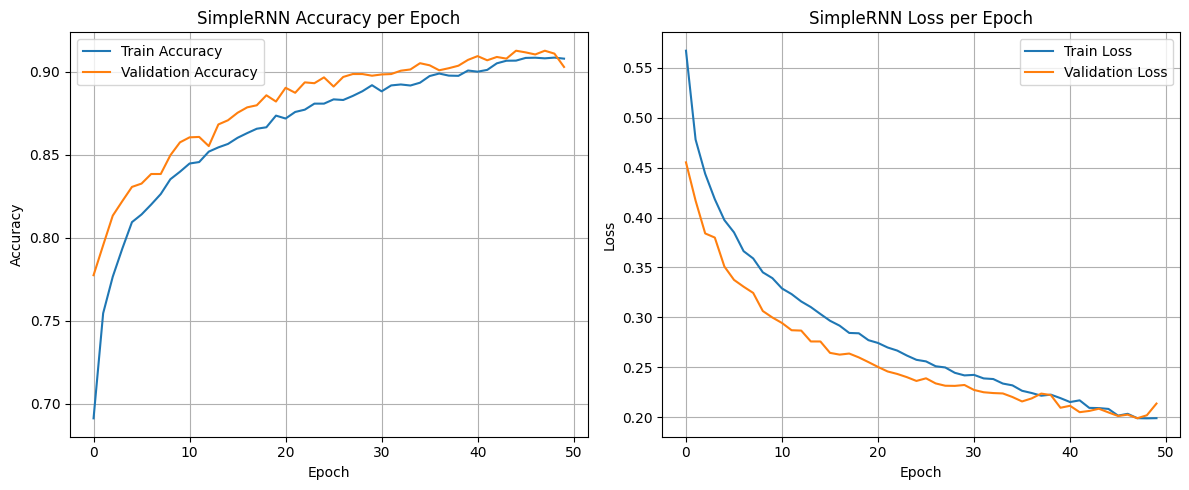


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 0.9042 ± 0.0059
Precision: 0.9321 ± 0.0110
Recall: 0.8722 ± 0.0188
F1: 0.9009 ± 0.0072
Auc: 0.9725 ± 0.0023


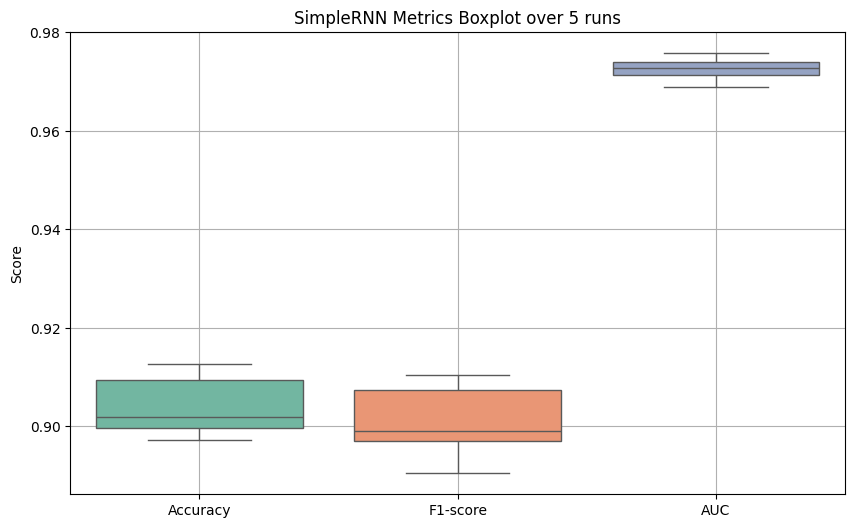


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6132 - loss: 0.6402 - val_accuracy: 0.7106 - val_loss: 0.4870
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7115 - loss: 0.5123 - val_accuracy: 0.7309 - val_loss: 0.4646
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7274 - loss: 0.4840 - val_accuracy: 0.7828 - val_loss: 0.4324
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7674 - loss: 0.4519 - val_accuracy: 0.8031 - val_loss: 0.4075
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7751 - loss: 0.4388 - val_accuracy: 0.8096 - val_loss: 0.3942
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7903 - loss: 0.4225 - val_accuracy: 0.8157 - val_loss: 0.3854
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8020 - loss: 0.4012 - val_accuracy: 0.8129 - val_loss: 0.3810
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy

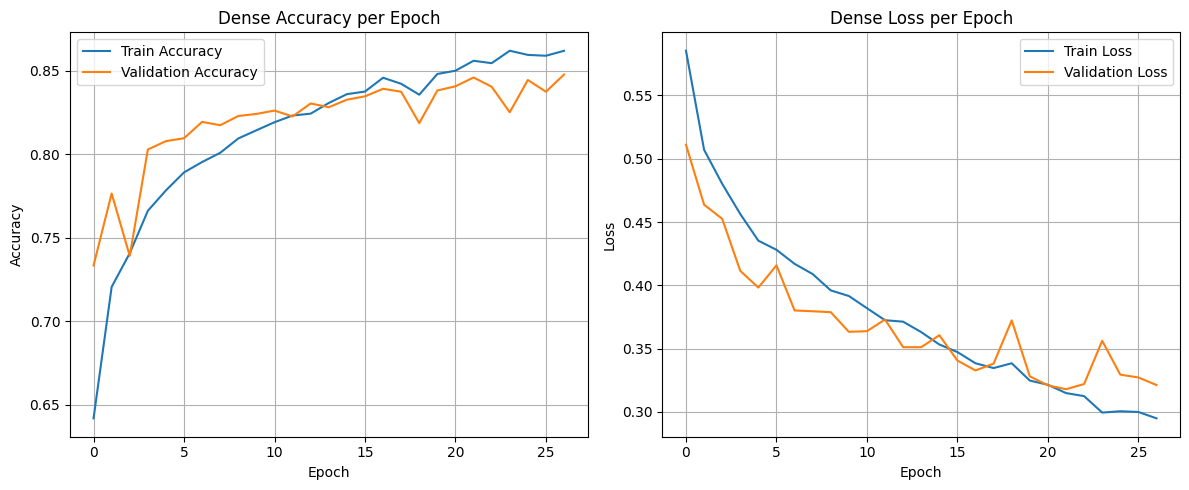


==== Summary for Dense (over 5 runs) ====
Accuracy: 0.8481 ± 0.0040
Precision: 0.8895 ± 0.0165
Recall: 0.7955 ± 0.0116
F1: 0.8396 ± 0.0030
Auc: 0.9333 ± 0.0023


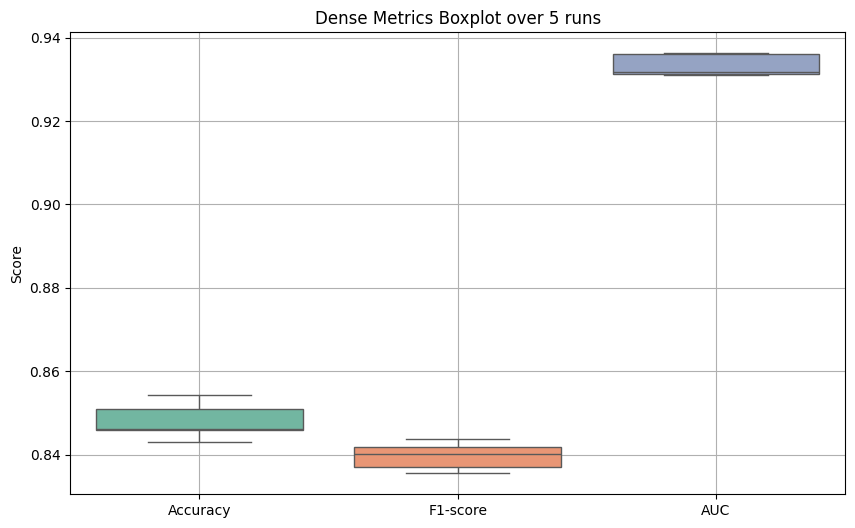


All run results saved to: /content/drive/MyDrive/ped1/results_all_models_coatnet_0_rw_224.csv


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'coatnet_0_rw_224'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/ped1'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()
